# Supervised Machine Learning: Drugs

- <a href="#Data-Visualisation">Data Viz</a>
- <a href="#Hypothesis-Testing">Hypothesis Testing</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

import scipy.stats as st
import pingouin as pg

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, auc, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.decomposition import PCA

## Data Collection

In [2]:
url=f"https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"

In [3]:
df=pd.read_csv(url, header=None)

In [4]:
names=f"""ID	ID
Age	age
Gender	gender
Education	level of education
Country	country of current residence
Ethnicity	ethnicity
Nscore	NEO-FFI-R Neuroticism
Escore	NEO-FFI-R Extraversion
Oscore	NEO-FFI-R Openness
Ascore	NEO-FFI-R Agreeableness
Cscore	NEO-FFI-R Conscientiousness
Impulsive	BIS-11 Impulsiveness
SS	ImpSS sensation
Alcohol	alcohol consumption (output attribute)
Amphet	amphetamines consumption (output attribute)
Amyl	amyl nitrite consumption (output attribute)
Benzos	benzodiazepine consumption (output attribute)
Caff	caffeine consumption (output attribute)
Cannabis	cannabis consumption (output attribute)
Choc	chocolate consumption (output attribute)
Coke	cocaine consumption (output attribute)
Crack	crack consumption (output attribute)
Ecstasy	ecstasy consumption (output attribute)
Heroin	heroin consumption (output attribute)
Ketamine	ketamine consumption (output attribute)
Legalh	legal highs consumption (output attribute)
LSD	LSD consumption (output attribute)
Meth	methadone consumption (output attribute)
Mushrooms	magic mushrooms consumption (output attribute)
Nicotine	nicotine consumption (output attribute)
Semer	fictitious drug Semeron consumption (output attribute)
VSA	volatile substance abuse consumption (output attribute)"""

In [5]:
names = [row.split("\t") for row in names.split(f"\n")]

In [6]:
df.columns=pd.DataFrame(names)[0]

In [7]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## Data Cleaning
### Incorrect Format

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

### Missing Values

In [9]:
df.isna().sum()

0
ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

## Unneccessary Columns

In [10]:
df.drop(columns="ID", inplace=True)

In [11]:
df.to_csv("data.csv", index=False)

## Bias Sample 

In [12]:
# Semeron is a fictious drug included on the survey to identify those who exaggerate their drug usage, therefore those indicated with usage should be removed
df.Semer.value_counts()
df.drop(df[df.Semer!="CL0"].index, axis=0, inplace=True)
df.drop(columns="Semer", inplace=True)

## Non-Numerical Columns

In [17]:
cat= list(set(df.columns).difference(set(df._get_numeric_data().columns)))

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
for c in cat:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c])

### Hard Drugs

In [21]:
hard_drugs=["Amphet", "Benzos", "Coke", "Crack", "Ecstasy", "Heroin", "Legalh", "Meth"]

In [22]:
df["hard"]=df[df[hard_drugs]>1].any(axis=1)

In [23]:
df.hard.value_counts(normalize=True).round(2)

True     0.64
False    0.36
Name: hard, dtype: float64

In [24]:
age_lb=["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
gender_lb=["Male", "Female"]
education_lb=["Left before 16", "Left at 16", "Left at 17", "Left at 18","Left at Uni", "Certificate/Diploma", "University", "Masters", "PhD"]
country_lb=["USA", "New Zealand", "Other", "Australia",  "Republic of Ireland", "Canada", "UK"]
ethnicity_lb=["Black", "Asian", "White", "Mixed-White/Black", "Other", "Mixed-White/Asian", "Mixed-Black/Asian"]

In [270]:
df.groupby("hard").agg(["mean", "std", "median", "min", "max"]).round(2).stack()[["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]]

Nscore  Escore  Oscore  Ascore  Cscore  Impulsive    SS
hard                                                                 
False mean     -0.23    0.07   -0.43    0.22    0.38      -0.36 -0.52
      std       0.92    0.92    0.90    0.93    0.91       0.91  0.84
      median   -0.25    0.00   -0.45    0.29    0.42      -0.22 -0.53
      min      -2.76   -2.73   -3.27   -2.54   -2.42      -2.56 -2.08
      max       2.61    2.86    2.90    2.76    3.46       2.90  1.92
True  mean      0.13   -0.04    0.24   -0.13   -0.22       0.21  0.28
      std       1.02    1.04    0.97    1.01    0.98       0.92  0.90
      median    0.14    0.00    0.29   -0.15   -0.28       0.19  0.40
      min      -3.46   -3.27   -3.27   -3.46   -3.46      -2.56 -2.08
      max       3.27    3.27    2.90    3.46    3.01       2.90  1.92

## Distribution of Variables

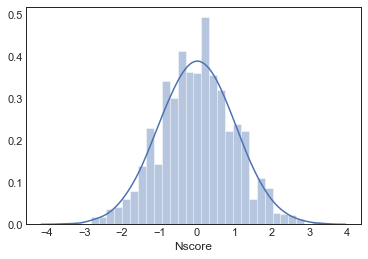

In [25]:
sns.distplot(df.Nscore)
plt.savefig("graph/Distribution Nscore.png")

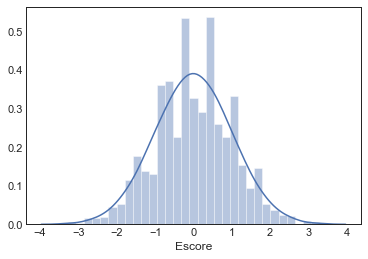

In [26]:
sns.distplot(df.Escore)
plt.savefig("graph/Distribution Escore.png")

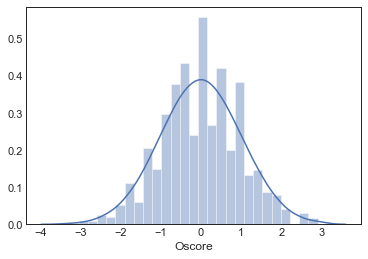

In [27]:
sns.distplot(df.Oscore)
plt.savefig("graph/Distribution Oscore.png")

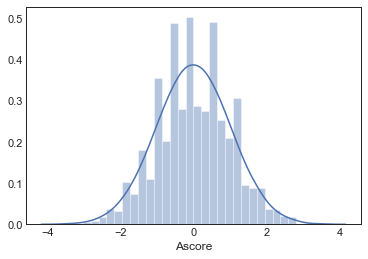

In [28]:
sns.distplot(df.Ascore)
plt.savefig("graph/Distribution Ascore.png")

In [ ]:
sns.distplot(df.Cscore)
plt.savefig("graph/Distribution Cscore.png")

In [ ]:
sns.distplot(df.Impulsive)
plt.savefig("graph/Distribution Impulsive.png")

In [ ]:
sns.distplot(df.SS)
plt.savefig("graph/Distribution SS.png")

In [276]:
df.loc[:, "Age":"SS"]

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


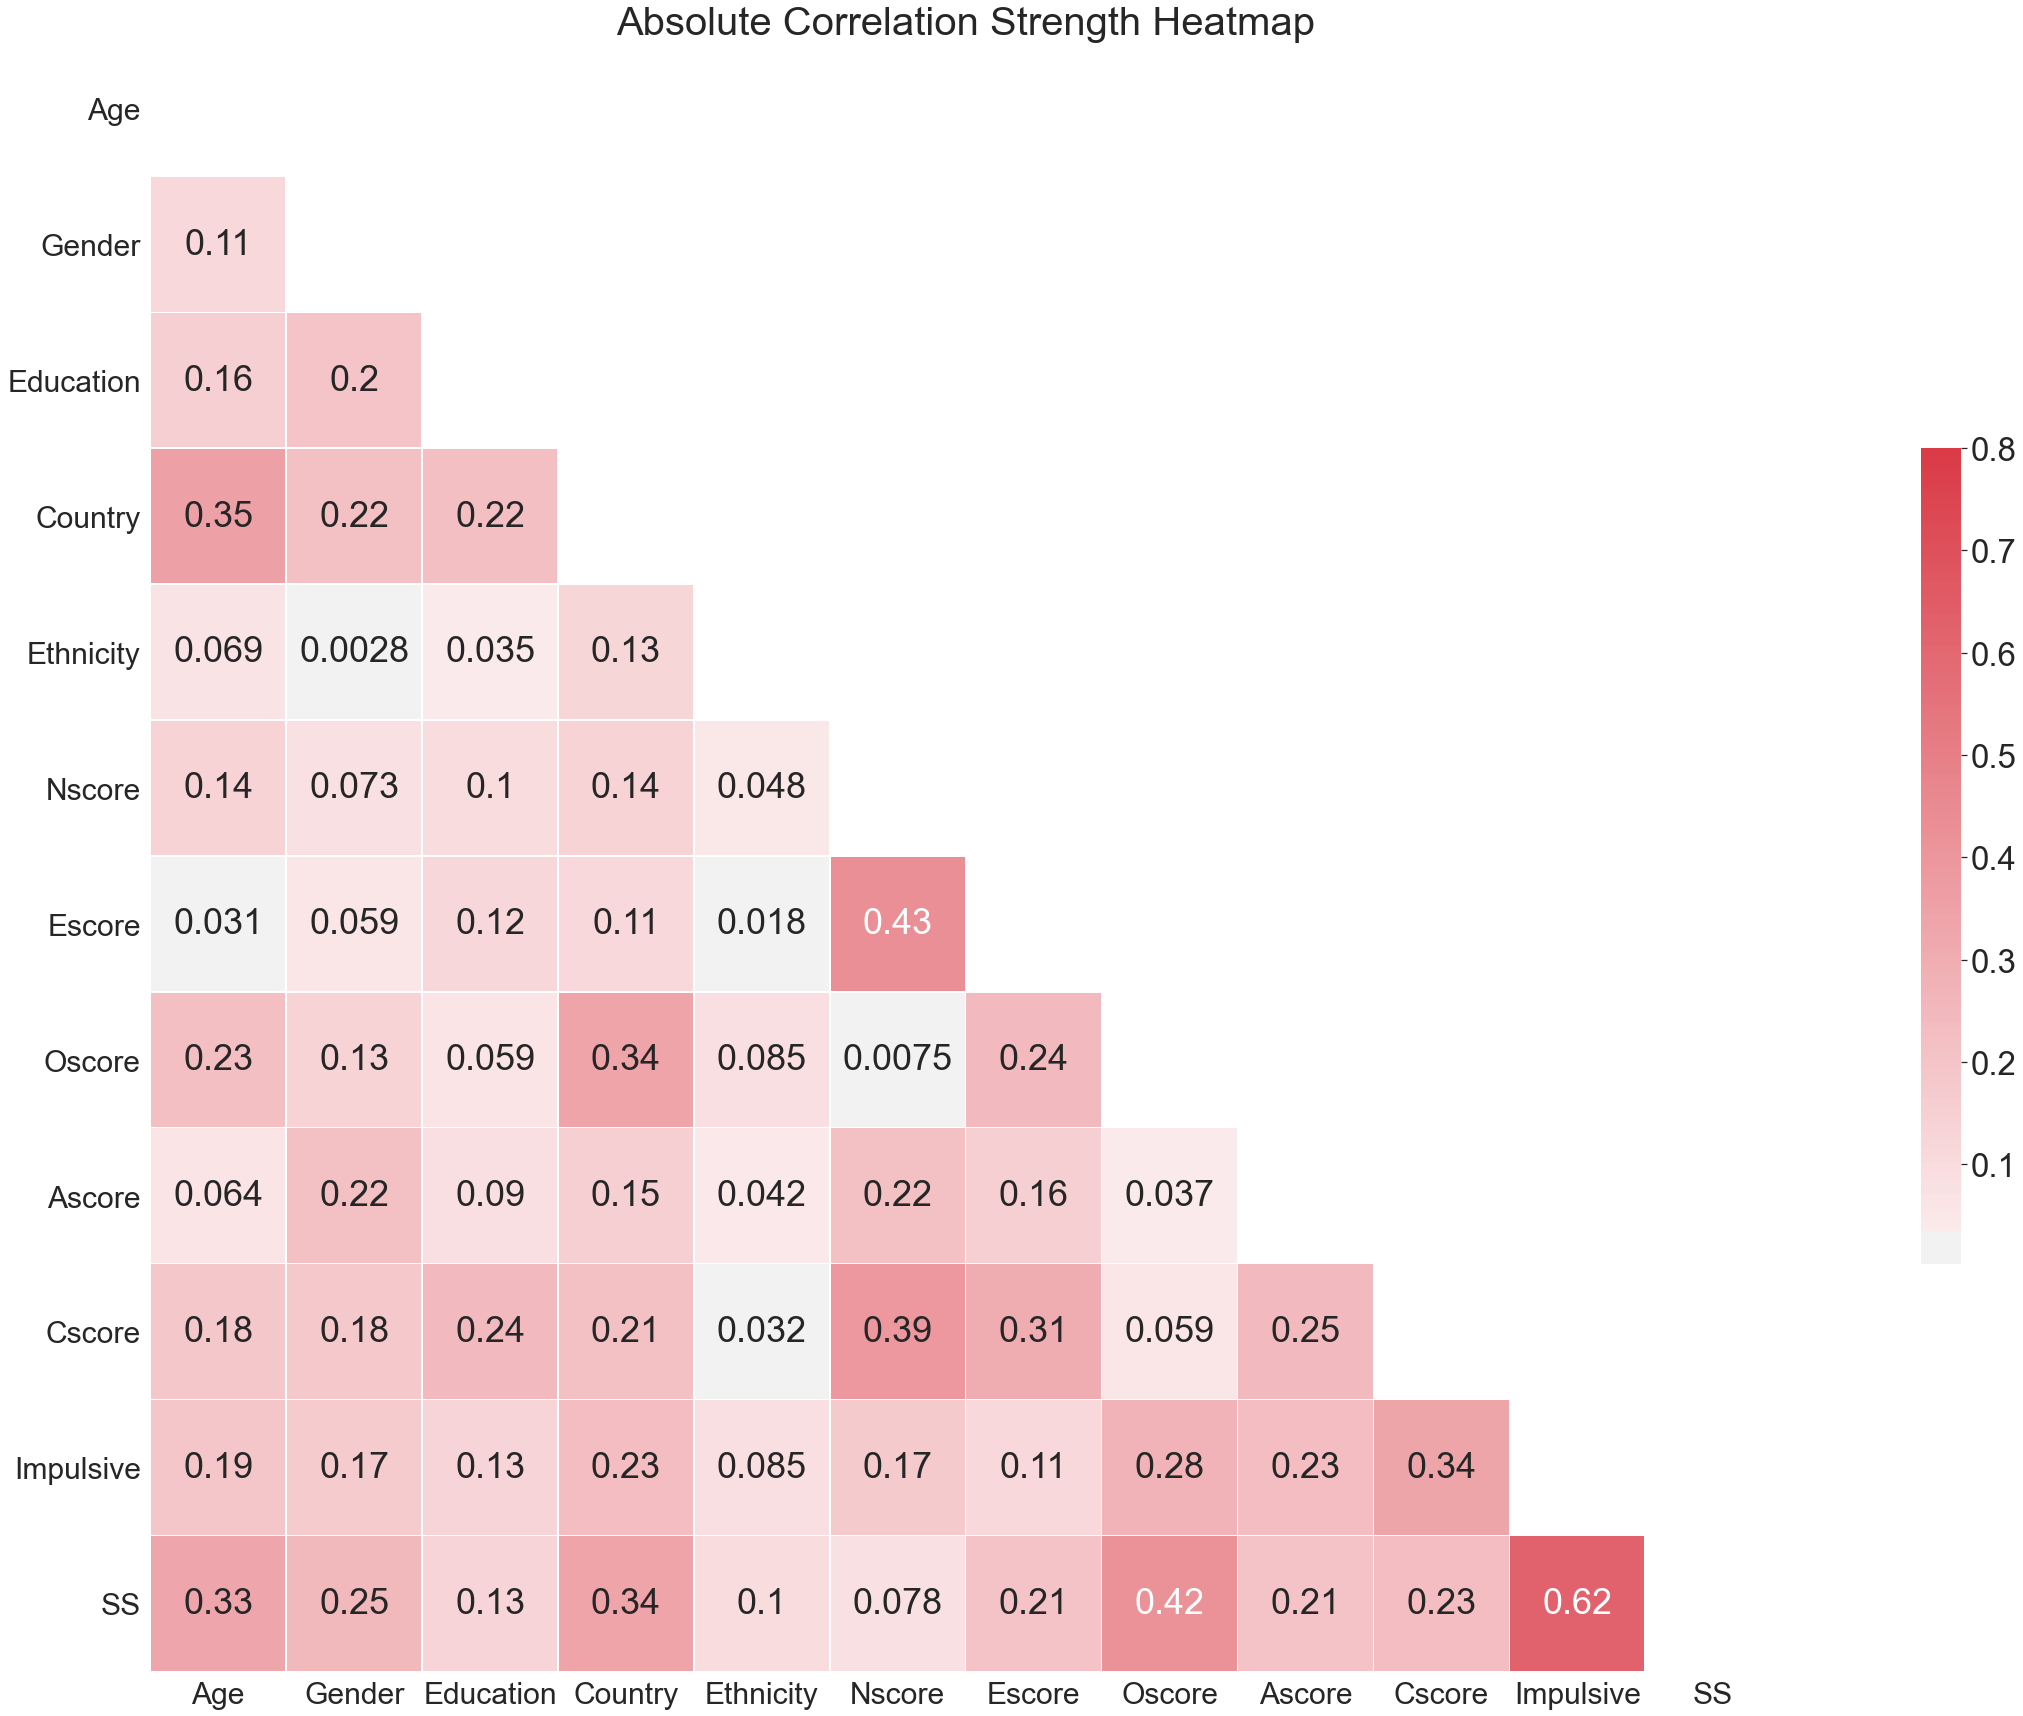

In [280]:
sns.set(style="white", font_scale = 3)

# Compute the correlation matrix
corr = abs(df.loc[:, "Age":"SS"].corr())

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, cmap=cmap, vmax=.8, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Absolute Correlation Strength Heatmap', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("")
plt.ylabel("")
plt.savefig("graph/correlation.png")
plt.show()

In [ ]:
df.shape

## Data Visualisation

### Variety of Drug Type Used by Gender

In [38]:
df["drug_use"]=df[df[hard_drugs]>1][hard_drugs].count(axis=1)

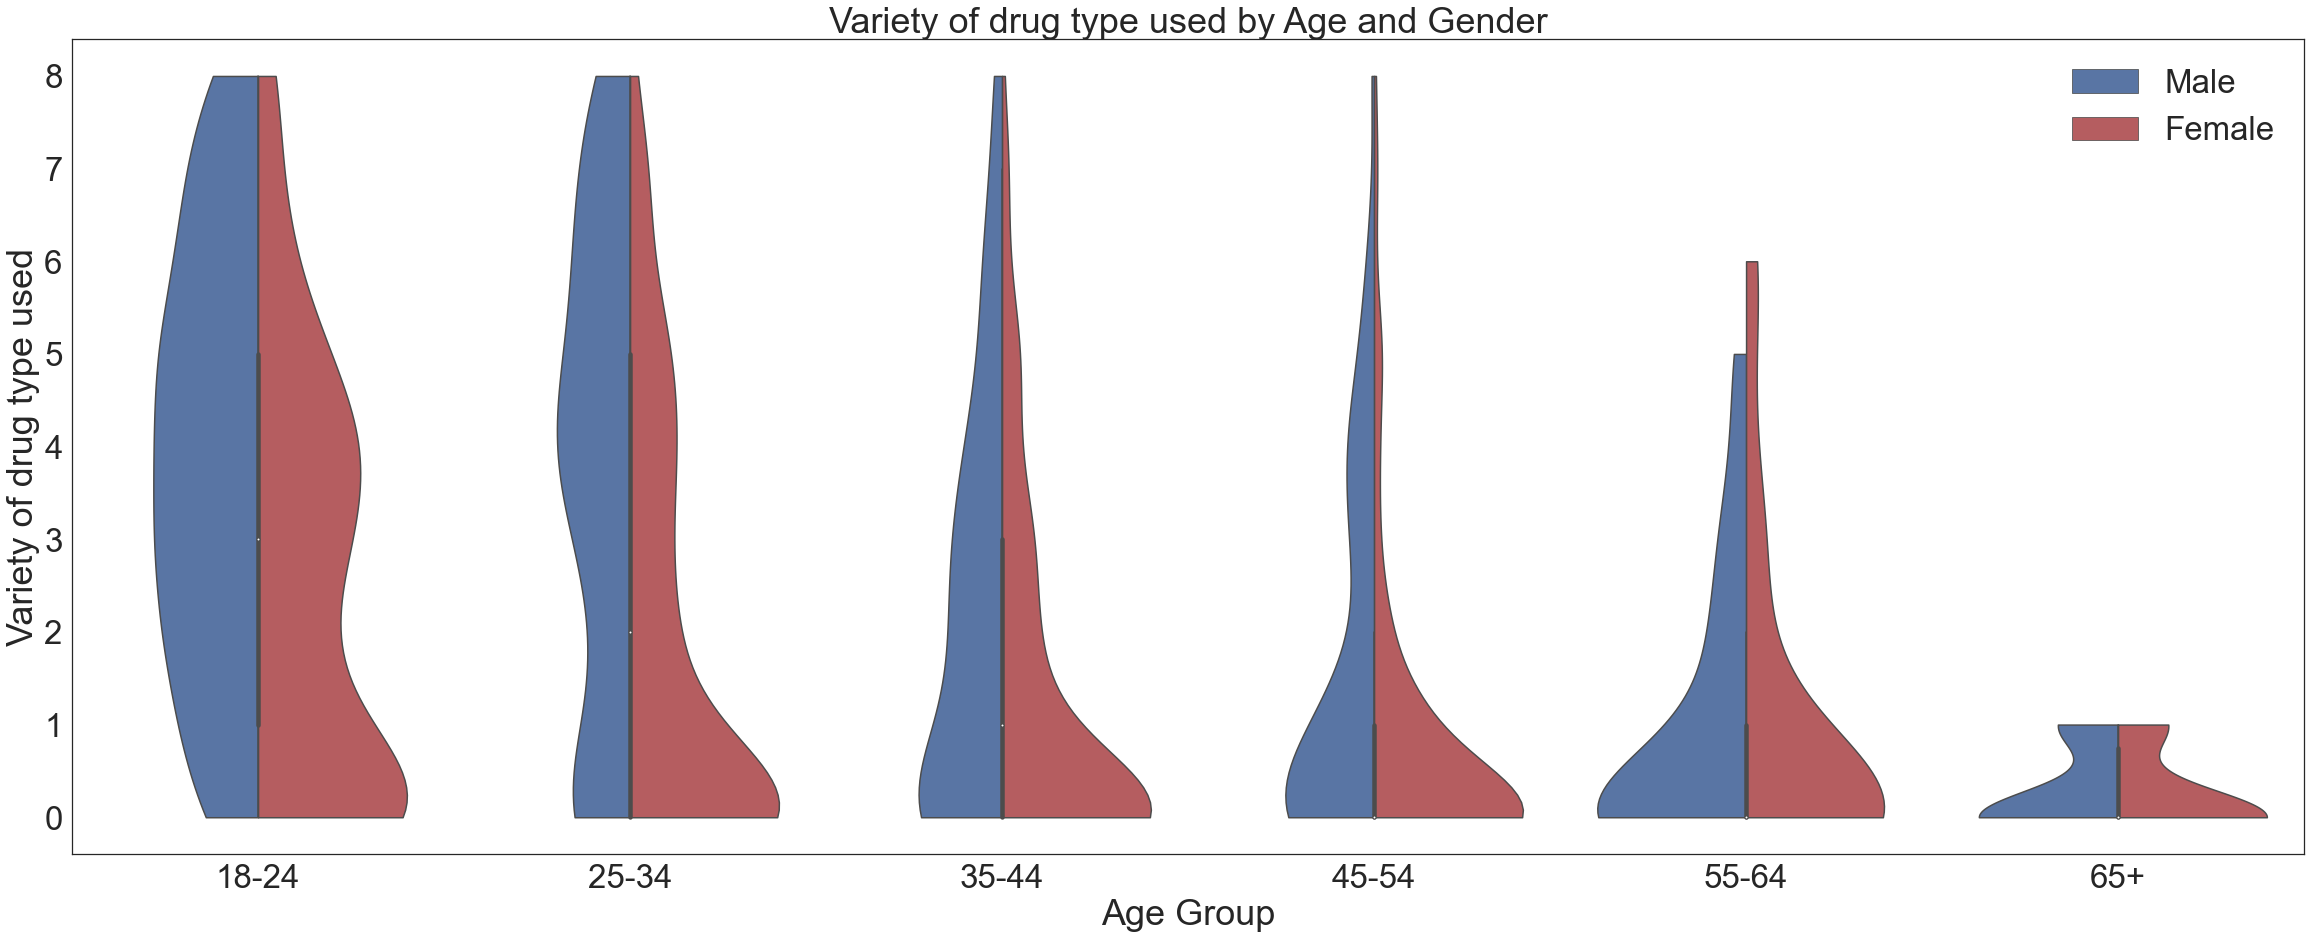

In [39]:
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 3)
f, ax = plt.subplots(figsize=(40, 15))

g=sns.violinplot(x="Age", y="drug_use", data=df,hue='Gender',split=True, legend=True, palette=["b","r"], cut=0)
g.set_xticklabels(age_lb)

g.set_ylabel("Variety of drug type used")
g.set_xlabel("Age Group")
g.set_title("Variety of drug type used by Age and Gender")
for t, l in zip(g.legend().texts, gender_lb): t.set_text(l)

plt.savefig("graph/Violin drug use by age.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Education", y="drug_use", data=df,hue='Gender',split=True, legend=True, palette=["b","r"], cut=0)
g.set_xticklabels(education_lb)

g.set_ylabel("Variety of drug type used")
g.set_xlabel("Education Level")
g.set_title("Variety of drug type used by Education and Gender")
for t, l in zip(g.legend().texts, gender_lb): t.set_text(l)

plt.savefig("graph/Violin drug use by education.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Country", y="drug_use", data=df,hue='Gender',split=True, legend=True, palette=["b","r"], cut=0)
g.set_xticklabels(country_lb)

g.set_ylabel("Variety of drug type used")
g.set_xlabel("Country of Residence")
g.set_title("Variety of drug type used by Country and Gender")
for t, l in zip(g.legend().texts, gender_lb): t.set_text(l)

plt.savefig("graph/Violin drug use by country.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Ethnicity", y="drug_use", data=df,hue='Gender',split=True, legend=True, palette=["b","r"], cut=0)
g.set_xticklabels(ethnicity_lb)

g.set_ylabel("Variety of drug type used")
g.set_xlabel("Ethnicity")
g.set_title("Variety of drug type used by Ethnicity and Gender")
for t, l in zip(g.legend().texts, gender_lb): t.set_text(l)

plt.savefig("graph/Violin drug use by ethnicity.png")
plt.show()

### NScore by User

In [29]:
user_lb=["Non-user", "Drug user"]

In [ ]:
f, ax = plt.subplots(figsize=(40, 15))

g=sns.violinplot(x="Age", y="Nscore", data=df,hue='hard',split=True, legend=True, palette=["g","r"], cut=0)
g.set_xticklabels(age_lb)

g.set_ylabel("Nscore")
g.set_xlabel("Age Group")
g.set_title("Nscore by Age")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin NScore by age.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Education", y="Nscore", data=df,hue='hard',split=True, legend=True, palette=["g","r"], cut=0)
g.set_xticklabels(education_lb)

g.set_ylabel("Nscore")
g.set_xlabel("Education Level")
g.set_title("Nscore by Education")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Nscore by education.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Country", y="Nscore", data=df,hue='hard',split=True, legend=True, palette=["g","r"], cut=0)
g.set_xticklabels(country_lb)

g.set_ylabel("Nscore")
g.set_xlabel("Country")
g.set_title("Nscore by Country")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Nscore by country.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Ethnicity", y="Nscore", data=df,hue='hard',split=True, legend=True, palette=["g","r"], cut=0)
g.set_xticklabels(ethnicity_lb)

g.set_ylabel("Nscore")
g.set_xlabel("Ethnicity")
g.set_title("Nscore by Ethnicity")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Nscore by ethnicity.png")
plt.show()

### EScore by User

In [ ]:
f, ax = plt.subplots(figsize=(40, 15))

g=sns.violinplot(x="Age", y="Escore", data=df,hue='hard',split=True, legend=True, palette=["c","r"], cut=0)
g.set_xticklabels(age_lb)

g.set_ylabel("Escore")
g.set_xlabel("Age Group")
g.set_title("Escore by Age")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin EScore by age.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Education", y="Escore", data=df,hue='hard',split=True, legend=True, palette=["c","r"], cut=0)
g.set_xticklabels(education_lb)

g.set_ylabel("Escore")
g.set_xlabel("Education Level")
g.set_title("Escore by Education")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Escore by education.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Country", y="Escore", data=df,hue='hard',split=True, legend=True, palette=["c","r"], cut=0)
g.set_xticklabels(country_lb)

g.set_ylabel("Escore")
g.set_xlabel("Country")
g.set_title("Escore by Country")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Escore by country.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Ethnicity", y="Escore", data=df,hue='hard',split=True, legend=True, palette=["c","r"], cut=0)
g.set_xticklabels(ethnicity_lb)

g.set_ylabel("Escore")
g.set_xlabel("Ethnicity")
g.set_title("Escore by Ethnicity")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Escore by ethnicity.png")
plt.show()

### OScore by User

In [ ]:
f, ax = plt.subplots(figsize=(40, 15))

g=sns.violinplot(x="Age", y="Oscore", data=df,hue='hard',split=True, legend=True, palette=["y","r"], cut=0)
g.set_xticklabels(age_lb)

g.set_ylabel("Oscore")
g.set_xlabel("Age Group")
g.set_title("Nscore by Age")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin OScore by age.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Education", y="Oscore", data=df,hue='hard',split=True, legend=True, palette=["y","r"], cut=0)
g.set_xticklabels(education_lb)

g.set_ylabel("Oscore")
g.set_xlabel("Education Level")
g.set_title("Oscore by Education")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Nscore by education.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Country", y="Oscore", data=df,hue='hard',split=True, legend=True, palette=["y","r"], cut=0)
g.set_xticklabels(country_lb)

g.set_ylabel("Oscore")
g.set_xlabel("Country")
g.set_title("Oscore by Country")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Oscore by country.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Ethnicity", y="Oscore", data=df,hue='hard',split=True, legend=True, palette=["y","r"], cut=0)
g.set_xticklabels(ethnicity_lb)

g.set_ylabel("Oscore")
g.set_xlabel("Ethnicity")
g.set_title("Oscore by Ethnicity")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Oscore by ethnicity.png")
plt.show()

### AScore by User

In [ ]:
f, ax = plt.subplots(figsize=(40, 15))

g=sns.violinplot(x="Age", y="Ascore", data=df,hue='hard',split=True, legend=True, palette=["m","r"], cut=0)
g.set_xticklabels(age_lb)

g.set_ylabel("Ascore")
g.set_xlabel("Age Group")
g.set_title("Ascore by Age")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin AScore by age.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Education", y="Ascore", data=df,hue='hard',split=True, legend=True, palette=["m","r"], cut=0)
g.set_xticklabels(education_lb)

g.set_ylabel("Ascore")
g.set_xlabel("Education Level")
g.set_title("Ascore by Education")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Ascore by education.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Country", y="Ascore", data=df,hue='hard',split=True, legend=True, palette=["m","r"], cut=0)
g.set_xticklabels(country_lb)

g.set_ylabel("Ascore")
g.set_xlabel("Country")
g.set_title("Ascore by Country")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Ascore by country.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Ethnicity", y="Escore", data=df,hue='hard',split=True, legend=True, palette=["m","r"], cut=0)
g.set_xticklabels(ethnicity_lb)

g.set_ylabel("Ascore")
g.set_xlabel("Ethnicity")
g.set_title("Ascore by Ethnicity")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Ascore by ethnicity.png")
plt.show()

### CScore by User

In [ ]:
f, ax = plt.subplots(figsize=(40, 15))

g=sns.violinplot(x="Age", y="Cscore", data=df,hue='hard',split=True, legend=True, palette=["w","r"], cut=0)
g.set_xticklabels(age_lb)

g.set_ylabel("Cscore")
g.set_xlabel("Age Group")
g.set_title("Cscore by Age")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin CScore by age.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Education", y="Cscore", data=df,hue='hard',split=True, legend=True, palette=["w","r"], cut=0)
g.set_xticklabels(education_lb)

g.set_ylabel("Cscore")
g.set_xlabel("Education Level")
g.set_title("Cscore by Education")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Cscore by education.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Country", y="Cscore", data=df,hue='hard',split=True, legend=True, palette=["w","r"], cut=0)
g.set_xticklabels(country_lb)

g.set_ylabel("Cscore")
g.set_xlabel("Country")
g.set_title("Cscore by Country")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Cscore by country.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Ethnicity", y="Cscore", data=df,hue='hard',split=True, legend=True, palette=["w","r"], cut=0)
g.set_xticklabels(ethnicity_lb)

g.set_ylabel("Cscore")
g.set_xlabel("Ethnicity")
g.set_title("Cscore by Ethnicity")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Cscore by ethnicity.png")
plt.show()

### Impulsive by User

In [ ]:
f, ax = plt.subplots(figsize=(40, 15))

g=sns.violinplot(x="Age", y="Impulsive", data=df,hue='hard',split=True, legend=True, palette=["g","m"], cut=0)
g.set_xticklabels(age_lb)

g.set_ylabel("Impulsive")
g.set_xlabel("Age Group")
g.set_title("Impulsive by Age")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Impulsive by age.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Education", y="Impulsive", data=df,hue='hard',split=True, legend=True, palette=["g","m"], cut=0)
g.set_xticklabels(education_lb)

g.set_ylabel("Impulsive")
g.set_xlabel("Education Level")
g.set_title("Impulsive by Education")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Impulsive by education.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Country", y="Impulsive", data=df,hue='hard',split=True, legend=True, palette=["g","m"], cut=0)
g.set_xticklabels(country_lb)

g.set_ylabel("Impulsive")
g.set_xlabel("Country")
g.set_title("Impulsive by Country")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Impulsive by country.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Ethnicity", y="Impulsive", data=df,hue='hard',split=True, legend=True, palette=["g","m"], cut=0)
g.set_xticklabels(ethnicity_lb)

g.set_ylabel("Impulsive")
g.set_xlabel("Ethnicity")
g.set_title("Impulsive by Ethnicity")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin Impulsive by ethnicity.png")
plt.show()

### SS by User

In [ ]:
f, ax = plt.subplots(figsize=(40, 15))

g=sns.violinplot(x="Age", y="SS", data=df,hue='hard',split=True, legend=True, palette=["y","m"], cut=0)
g.set_xticklabels(age_lb)

g.set_ylabel("SS")
g.set_xlabel("Age Group")
g.set_title("SS by Age")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin SS by age.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Education", y="SS", data=df,hue='hard',split=True, legend=True, palette=["y","m"], cut=0)
g.set_xticklabels(education_lb)

g.set_ylabel("SS")
g.set_xlabel("Education Level")
g.set_title("SS by Education")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin SS by education.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Country", y="SS", data=df,hue='hard',split=True, legend=True, palette=["y","m"], cut=0)
g.set_xticklabels(country_lb)

g.set_ylabel("SS")
g.set_xlabel("Country")
g.set_title("SS by Country")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin SS by country.png")
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(40, 25))
g=sns.violinplot(x="Ethnicity", y="SS", data=df,hue='hard',split=True, legend=True, palette=["y","m"], cut=0)
g.set_xticklabels(ethnicity_lb)

g.set_ylabel("SS")
g.set_xlabel("Ethnicity")
g.set_title("SS by Ethnicity")
for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

plt.savefig("graph/Violin SS by ethnicity.png")
plt.show()

In [30]:
# Drug Type vs Non-user/User
pivot=[]
for c in cat:
    x=df[c].value_counts()
    pivot.append(pd.Series(data=[c, x[x.index<2].sum(), x[x.index>=2].sum()]))
#pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User

In [31]:
x=pd.DataFrame(data=pivot)
x.set_index(0, drop=True, inplace=True)
x.columns=["Non-user", "User"]

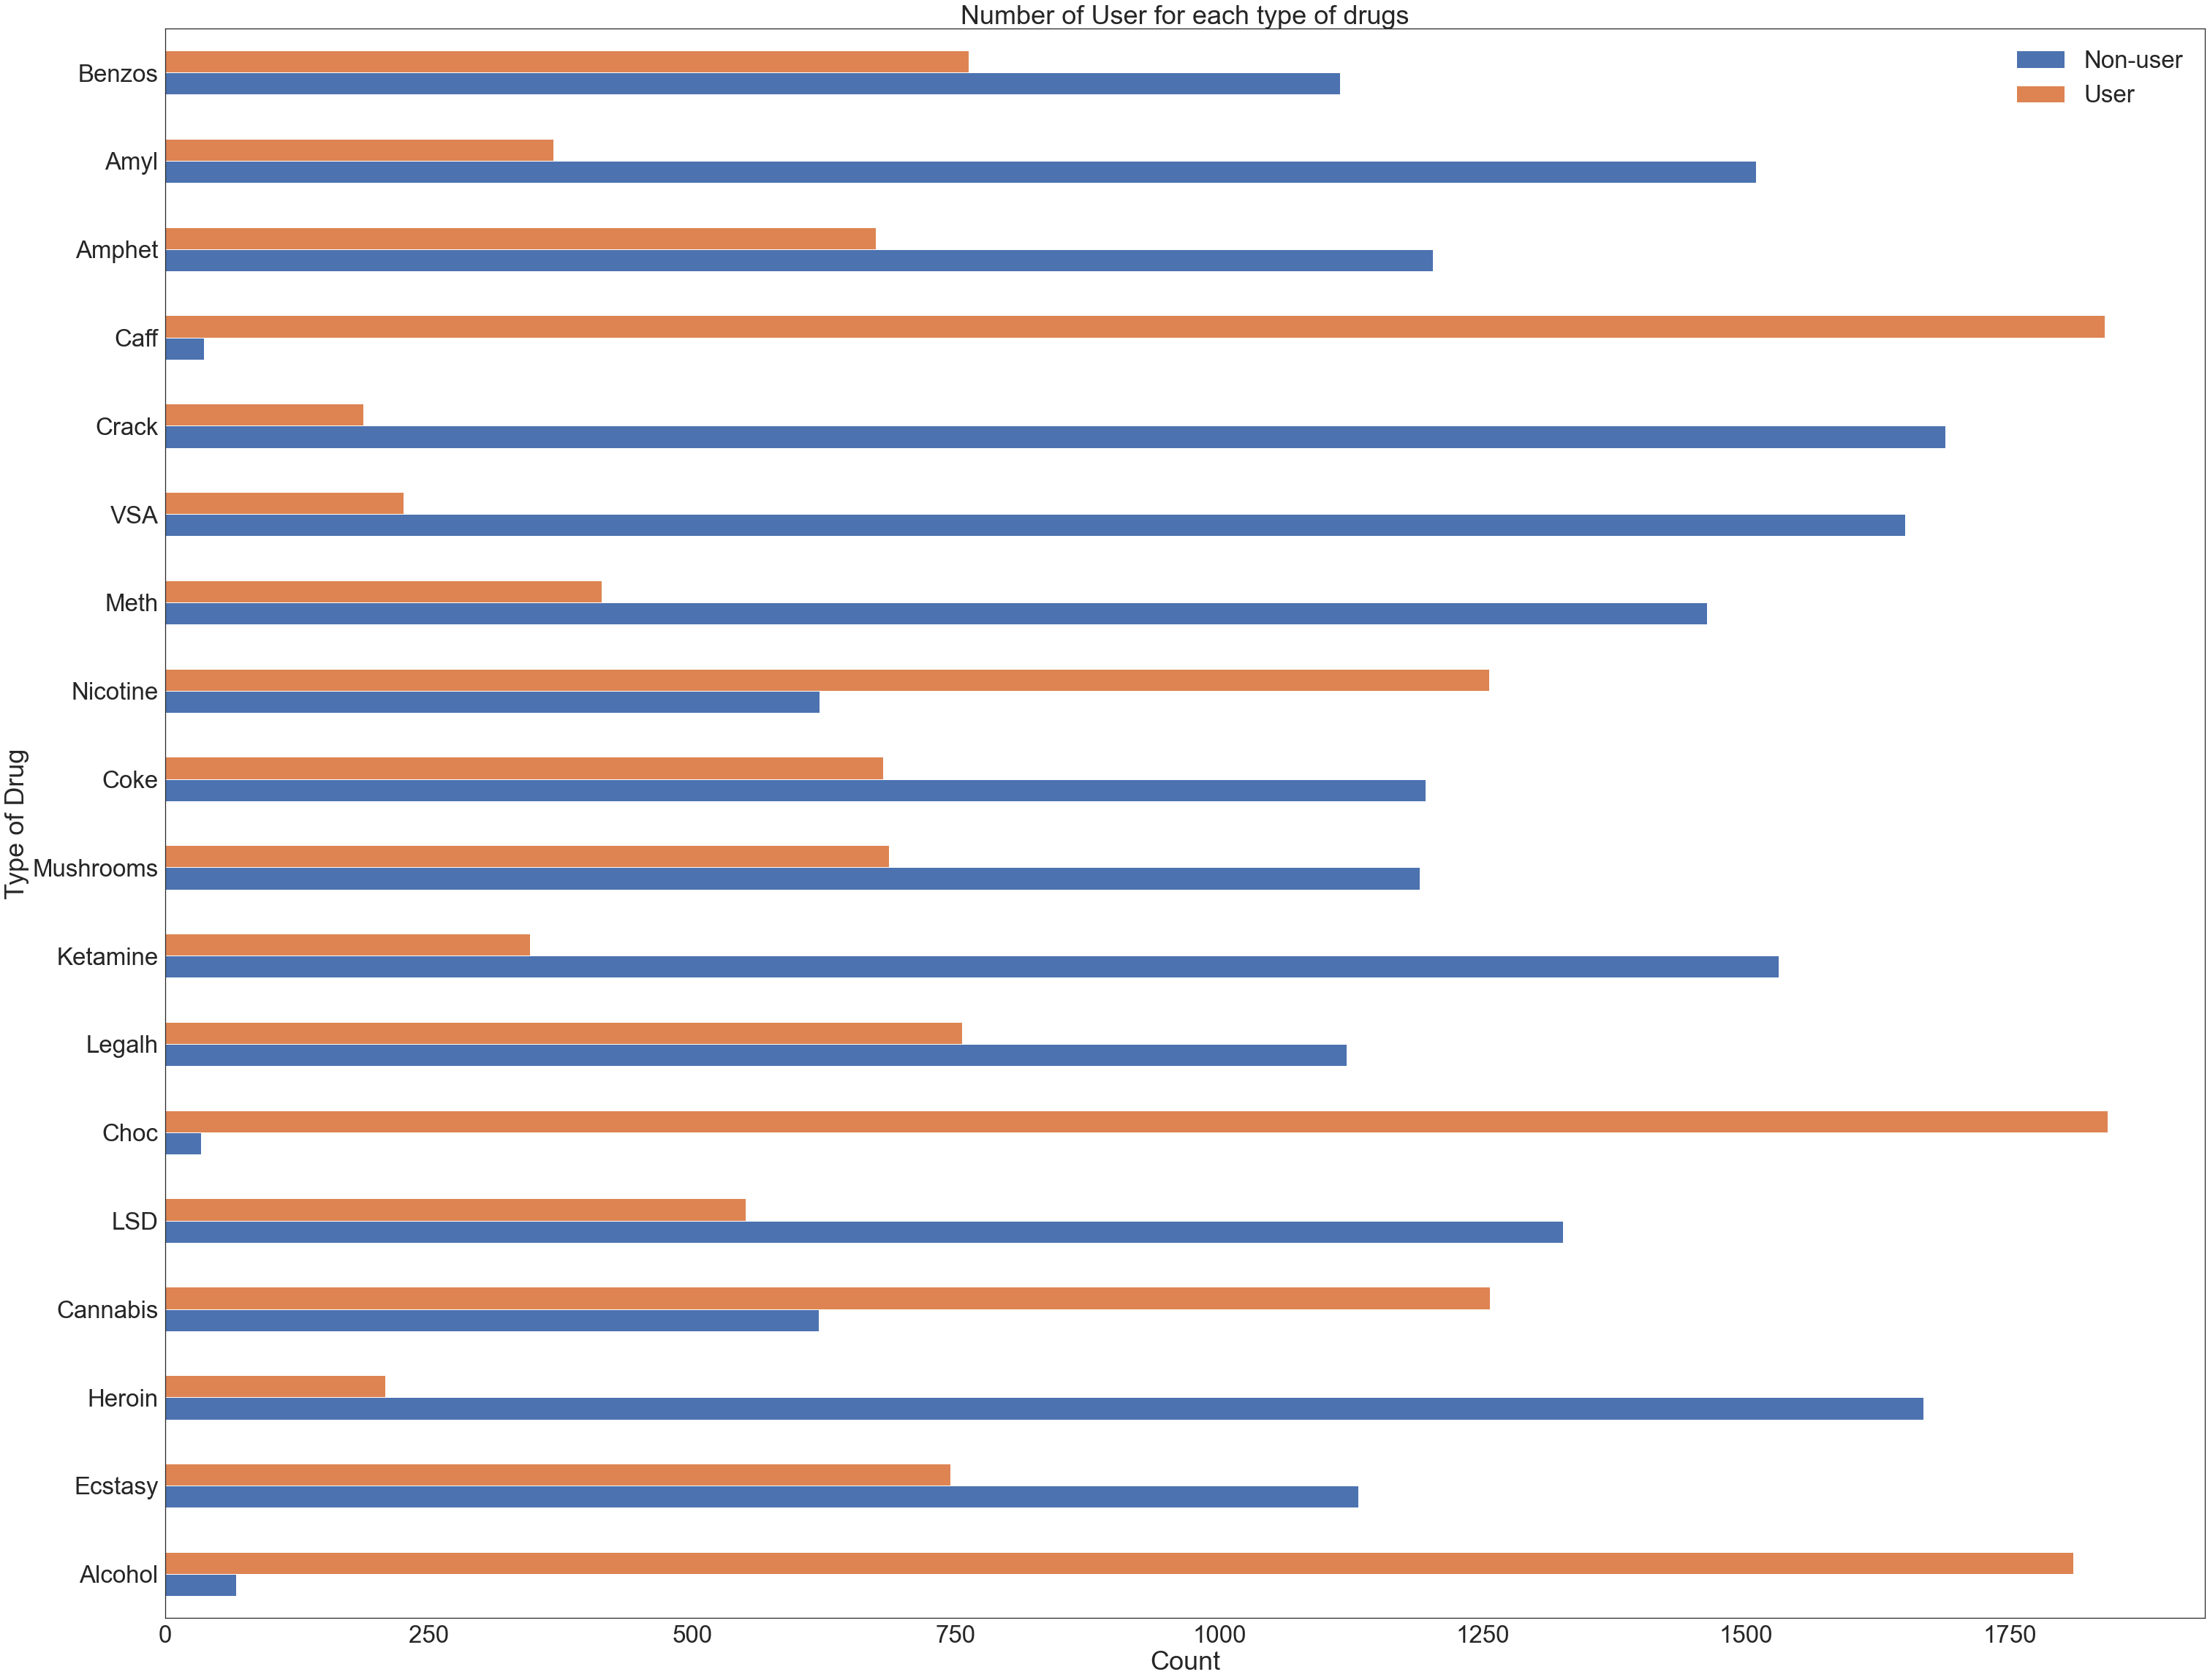

In [35]:
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 3)
x.plot(kind="barh", figsize=(50,40), grid=None, title="Number of User for each type of drugs", )
plt.ylabel("Type of Drug")
plt.xlabel("Count")
plt.savefig("graph/Bar User by drugs")

## Hypothesis Testing
### Variety of Drug Type Used

In [53]:
demo=["Age", "Education", "Country", "Ethnicity"]
outcome=[]
for d in demo:
    outcome.append(pg.welch_anova(dv="drug_use", between=d, data=df).iloc[0, :])
pd.DataFrame(outcome).set_index("Source")

,ddof1,ddof2,F,p-unc,np2
Source,,,,,
Age,5,209.552404,116.258358,1.911703e-58,0.140557
Education,8,247.968774,27.665282,1.606804e-30,0.108827
Country,6,47.186287,95.670353,1.050801e-24,0.256625
Ethnicity,6,23.430186,9.991659,1.667975e-05,0.018404


In [40]:
# age
pg.welch_anova(dv='drug_use', between='Age', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,Age,5,209.552404,116.258358,1.911703e-58,0.140557


In [41]:
pair=pg.pairwise_gameshowell(data=df, dv='drug_use',between='Age')
pair[pair.pval<0.05]

,A,B,mean(A),mean(B),diff,se,tail,T,df,pval,hedges
0,-0.95197,-0.07854,3.368917,2.633333,0.735583,0.106851,two-sided,4.867864,996.059943,0.001000,0.294024
1,-0.95197,0.49788,3.368917,1.673239,1.695677,0.103455,two-sided,11.589875,822.322933,0.001000,0.767046
2,-0.95197,1.09449,3.368917,1.132653,2.236264,0.099898,two-sided,15.828880,749.069421,0.001000,1.115144
3,-0.95197,1.82213,3.368917,0.935484,2.433433,0.131440,two-sided,13.091164,166.695331,0.001000,1.451713
4,-0.95197,2.59171,3.368917,0.277778,3.091139,0.102274,two-sided,21.371743,52.583318,0.001000,5.102175
5,-0.07854,0.49788,2.633333,1.673239,0.960094,0.114023,two-sided,5.953974,825.360349,0.001000,0.416413
6,-0.07854,1.09449,2.633333,1.132653,1.500680,0.110806,two-sided,9.576548,759.628996,0.001000,0.708538
7,-0.07854,1.82213,2.633333,0.935484,1.697849,0.139910,two-sided,8.580969,206.446666,0.001000,0.970913
8,-0.07854,2.59171,2.633333,0.277778,2.355556,0.112952,two-sided,14.746288,75.843137,0.001000,3.534948
9,0.49788,1.09449,1.673239,1.132653,0.540586,0.107535,two-sided,3.554685,646.342907,0.005187,0.279983


In [54]:
# education
pg.welch_anova(dv='drug_use', between='Education', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,Education,8,247.968774,27.665282,1.606804e-30,0.108827


In [55]:
pair=pg.pairwise_gameshowell(data=df, dv='drug_use',between='Education')
pair[pair.pval<0.05]

,A,B,mean(A),mean(B),diff,se,tail,T,df,pval,hedges
9,-1.73790,-1.22751,1.959184,3.191919,-1.232736,0.247924,two-sided,-3.515899,194.685995,0.014071,-0.499072
10,-1.73790,-0.61113,1.959184,3.495030,-1.535846,0.187474,two-sided,-5.792835,138.135908,0.001000,-0.638833
22,-1.22751,-0.05921,3.191919,1.829630,1.362290,0.202399,two-sided,4.759327,155.079966,0.001000,0.558046
23,-1.22751,0.45468,3.191919,1.966527,1.225392,0.193821,two-sided,4.470527,133.227052,0.001000,0.493001
24,-1.22751,1.16365,3.191919,1.409894,1.782025,0.198483,two-sided,6.348568,144.800397,0.001000,0.739840
25,-1.22751,1.98437,3.191919,1.707865,1.484054,0.243350,two-sided,4.312243,185.818736,0.001000,0.627354
26,-0.61113,-0.05921,3.495030,1.829630,1.665400,0.121020,two-sided,9.730791,599.711744,0.001000,0.733414
27,-0.61113,0.45468,3.495030,1.966527,1.528503,0.106052,two-sided,10.191400,978.954782,0.001000,0.650485
28,-0.61113,1.16365,3.495030,1.409894,2.085136,0.114349,two-sided,12.893957,671.598138,0.001000,0.957204
29,-0.61113,1.98437,3.495030,1.707865,1.787165,0.181382,two-sided,6.967142,128.714281,0.001000,0.800173


In [56]:
# country
pg.welch_anova(dv='drug_use', between='Country', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,Country,6,47.186287,95.670353,1.050801e-24,0.256625


In [57]:
pair=pg.pairwise_gameshowell(data=df, dv='drug_use',between='Country')  
pair[pair.pval<0.05]

,A,B,mean(A),mean(B),diff,se,tail,T,df,pval,hedges
1,-0.57009,-0.28519,4.068966,2.610169,1.458796,0.162847,two-sided,6.334303,173.531374,0.001000,0.641810
4,-0.57009,0.24923,4.068966,2.850575,1.218391,0.211879,two-sided,4.066149,107.897373,0.001145,0.468539
5,-0.57009,0.96082,4.068966,1.316092,2.752874,0.081250,two-sided,23.957866,950.577135,0.001000,1.260950
14,-0.28519,0.96082,2.610169,1.316092,1.294078,0.152976,two-sided,5.981658,136.477359,0.001000,0.580567
17,-0.09765,0.96082,3.365385,1.316092,2.049293,0.207012,two-sided,6.999930,55.408646,0.001000,0.993915
19,0.21128,0.96082,3.150000,1.316092,1.833908,0.303215,two-sided,4.276730,19.740853,0.001203,0.964740
20,0.24923,0.96082,2.850575,1.316092,1.534483,0.204390,two-sided,5.308692,93.632578,0.001000,0.591998


In [58]:
# ethnicity
pg.welch_anova(dv='drug_use', between='Ethnicity', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,Ethnicity,6,23.430186,9.991659,0.000017,0.018404


In [59]:
pair=pg.pairwise_gameshowell(data=df, dv='drug_use',between='Ethnicity')  
pair[pair.pval<0.05]

,A,B,mean(A),mean(B),diff,se,tail,T,df,pval,hedges
1,-1.10702,-0.31685,0.818182,2.363265,-1.545083,0.169287,two-sided,-6.453751,36.194348,0.001000,-1.133724
3,-1.10702,0.11440,0.818182,3.209677,-2.391496,0.287242,two-sided,-5.887169,92.873910,0.001000,-1.258315
4,-1.10702,0.12600,0.818182,3.650000,-2.831818,0.488053,two-sided,-4.102830,23.925024,0.001897,-1.145469
6,-0.50212,-0.31685,1.000000,2.363265,-1.363265,0.248420,two-sided,-3.880416,25.389382,0.003973,-0.781382
8,-0.50212,0.11440,1.000000,3.209677,-2.209677,0.339945,two-sided,-4.596270,66.570478,0.001000,-1.079292
9,-0.50212,0.12600,1.000000,3.650000,-2.650000,0.520817,two-sided,-3.597874,29.445154,0.009433,-1.060426


### NScore

In [74]:
demo=["Age", "Education", "Country", "Ethnicity"]
outcome=[]
for d in demo:
    if pg.welch_anova(dv="Nscore", between=d, data=df).loc[0, "p-unc"]<0.05:
        outcome.append(pg.welch_anova(dv="Nscore", between=d, data=df).iloc[0, :])
pd.DataFrame(outcome).set_index("Source")

,ddof1,ddof2,F,p-unc,np2
Source,,,,,
Age,5,158.612159,8.674767,2.733635e-07,0.021567
Education,8,249.763530,3.912661,2.256564e-04,0.017943
Country,6,47.311106,6.380080,5.675528e-05,0.022321


In [78]:
demo=["Age", "Education", "Country", "Ethnicity"]
outcome=[]
for d in demo:
    if pg.welch_anova(dv="Escore", between=d, data=df).loc[0, "p-unc"]<0.05:
        outcome.append(pg.welch_anova(dv="Escore", between=d, data=df).iloc[0, :])
pd.DataFrame(outcome).set_index("Source")

,ddof1,ddof2,F,p-unc,np2
Source,,,,,
Age,5,164.005827,3.114353,0.010316,0.004588
Education,8,252.503181,4.201339,0.000096,0.016681
Country,6,48.143674,6.455138,0.000048,0.016588


In [79]:
demo=["Age", "Education", "Country", "Ethnicity"]
outcome=[]
for d in demo:
    if pg.welch_anova(dv="Oscore", between=d, data=df).loc[0, "p-unc"]<0.05:
        outcome.append(pg.welch_anova(dv="Oscore", between=d, data=df).iloc[0, :])
pd.DataFrame(outcome).set_index("Source")

,ddof1,ddof2,F,p-unc,np2
Source,,,,,
Age,5,157.657204,24.743167,2.376281e-18,0.062409
Education,8,250.060736,17.393925,1.544212e-20,0.066481
Country,6,47.727651,40.453656,4.382874e-17,0.117543
Ethnicity,6,23.237764,4.822009,2.489616e-03,0.009229


In [80]:
demo=["Age", "Education", "Country", "Ethnicity"]
outcome=[]
for d in demo:
    if pg.welch_anova(dv="Ascore", between=d, data=df).loc[0, "p-unc"]<0.05:
        outcome.append(pg.welch_anova(dv="Ascore", between=d, data=df).iloc[0, :])
pd.DataFrame(outcome).set_index("Source")

,ddof1,ddof2,F,p-unc,np2
Source,,,,,
Age,5,158.215625,3.784890,0.002893,0.009745
Education,8,249.972735,3.280852,0.001407,0.013769
Country,6,47.261994,8.849977,0.000002,0.029216


In [81]:
demo=["Age", "Education", "Country", "Ethnicity"]
outcome=[]
for d in demo:
    if pg.welch_anova(dv="Cscore", between=d, data=df).loc[0, "p-unc"]<0.05:
        outcome.append(pg.welch_anova(dv="Cscore", between=d, data=df).iloc[0, :])
pd.DataFrame(outcome).set_index("Source")

,ddof1,ddof2,F,p-unc,np2
Source,,,,,
Age,5,159.702660,15.294375,2.841878e-12,0.040457
Education,8,249.449489,21.771635,5.024382e-25,0.087843
Country,6,47.525843,14.859077,1.776062e-09,0.048410


In [82]:
demo=["Age", "Education", "Country", "Ethnicity"]
outcome=[]
for d in demo:
    if pg.welch_anova(dv="Impulsive", between=d, data=df).loc[0, "p-unc"]<0.05:
        outcome.append(pg.welch_anova(dv="Impulsive", between=d, data=df).iloc[0, :])
pd.DataFrame(outcome).set_index("Source")

,ddof1,ddof2,F,p-unc,np2
Source,,,,,
Age,5,159.105232,17.173938,1.439963e-13,0.044885
Education,8,249.433668,10.444997,1.290355e-12,0.042917
Country,6,47.295789,17.356915,1.732540e-10,0.055423
Ethnicity,6,24.013827,12.124741,2.928179e-06,0.007751


In [83]:
demo=["Age", "Education", "Country", "Ethnicity"]
outcome=[]
for d in demo:
    if pg.welch_anova(dv="SS", between=d, data=df).loc[0, "p-unc"]<0.05:
        outcome.append(pg.welch_anova(dv="SS", between=d, data=df).iloc[0, :])
pd.DataFrame(outcome).set_index("Source")

,ddof1,ddof2,F,p-unc,np2
Source,,,,,
Age,5,159.214605,53.527308,2.204679e-32,0.117480
Education,8,248.033930,16.659904,1.024107e-19,0.063954
Country,6,47.500626,40.046050,5.920570e-17,0.118927
Ethnicity,6,23.178090,4.145469,5.683442e-03,0.012710


In [72]:
pg.welch_anova(dv="Nscore", between='Age', data=df).loc[0, "p-unc"]<0.05

True

In [60]:
# age
pg.welch_anova(dv='Nscore', between='Age', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,Age,5,158.612159,8.674767,2.733635e-07,0.021567


In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Nscore',between='Age')
pair[pair.pval<0.05]

In [61]:
# education
pg.welch_anova(dv='Nscore', between='Education', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,Education,8,249.76353,3.912661,0.000226,0.017943


In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Nscore',between='Education')
pair[pair.pval<0.05]

In [62]:
# country
pg.welch_anova(dv='Nscore', between='Country', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,Country,6,47.311106,6.38008,0.000057,0.022321


In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Nscore',between='Country')  
pair[pair.pval<0.05]

### EScore

In [ ]:
# age
pg.welch_anova(dv='Escore', between='Age', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Escore',between='Age')
pair[pair.pval<0.05]

In [ ]:
# education
pg.welch_anova(dv='Escore', between='Education', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Escore',between='Education')
pair[pair.pval<0.05]

In [ ]:
# country
pg.welch_anova(dv='Escore', between='Country', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Escore',between='Country')  
pair[pair.pval<0.05]

### OScore

In [ ]:
# age
pg.welch_anova(dv='Oscore', between='Age', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Oscore',between='Age')
pair[pair.pval<0.05]

In [ ]:
# education
pg.welch_anova(dv='Oscore', between='Education', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Oscore',between='Education')
pair[pair.pval<0.05]

In [ ]:
# country
pg.welch_anova(dv='Oscore', between='Country', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Oscore',between='Country')  
pair[pair.pval<0.05]

In [ ]:
# ethnicity
pg.welch_anova(dv='Oscore', between='Ethnicity', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Oscore',between='Ethnicity')  
pair[pair.pval<0.05]

### AScore

In [ ]:
# age
pg.welch_anova(dv='Ascore', between='Age', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Ascore',between='Age')
pair[pair.pval<0.05]

In [ ]:
# education
pg.welch_anova(dv='Ascore', between='Education', data=df)

In [ ]:
# country
pg.welch_anova(dv='Ascore', between='Country', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Ascore',between='Country')  
pair[pair.pval<0.05]

### CScore

In [ ]:
# age
pg.welch_anova(dv='Cscore', between='Age', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Cscore',between='Age')
pair[pair.pval<0.05]

In [ ]:
# education
pg.welch_anova(dv='Cscore', between='Education', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Cscore',between='Education')
pair[pair.pval<0.05]

In [ ]:
# country
pg.welch_anova(dv='Cscore', between='Country', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Cscore',between='Country')  
pair[pair.pval<0.05]

### Impulsive

In [ ]:
# age
pg.welch_anova(dv='Impulsive', between='Age', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Impulsive',between='Age')
pair[pair.pval<0.05]

In [ ]:
# education
pg.welch_anova(dv='Impulsive', between='Education', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Impulsive',between='Education')
pair[pair.pval<0.05]

In [ ]:
# country
pg.welch_anova(dv='Impulsive', between='Country', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Impulsive',between='Country')  
pair[pair.pval<0.05]

In [ ]:
# ethnicity
pg.welch_anova(dv='Impulsive', between='Ethnicity', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='Impulsive',between='Ethnicity')  
pair[pair.pval<0.05]

### SS

In [ ]:
# age
pg.welch_anova(dv='SS', between='Age', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='SS',between='Age')
pair[pair.pval<0.05]

In [ ]:
# education
pg.welch_anova(dv='SS', between='Education', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='SS',between='Education')
pair[pair.pval<0.05]

In [ ]:
# country
pg.welch_anova(dv='SS', between='Country', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='SS',between='Country')  
pair[pair.pval<0.05]

In [ ]:
# ethnicity
pg.welch_anova(dv='SS', between='Ethnicity', data=df)

In [ ]:
pair=pg.pairwise_gameshowell(data=df, dv='SS',between='Ethnicity')  
pair[pair.pval<0.05]

### Non-user vs Drug user

In [91]:
scores=["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]
outcome=[]
for s in scores:
    t, p = st.ttest_ind(df[df.hard==True][s], df[df.hard==False][s], equal_var=False)
    if p<0.05:
        outcome.append([s, t, p])
pd.DataFrame(outcome, columns=["Source", "t-score", "p"]).set_index("Source")

,t-score,p
Source,,
Nscore,7.638947,3.858242e-14
Escore,-2.408341,1.614198e-02
Oscore,14.991695,1.974615e-47
Ascore,-7.596417,5.307700e-14
Cscore,-13.281847,3.921799e-38
Impulsive,12.948954,2.493898e-36
SS,19.381942,9.524884e-75


In [ ]:
st.ttest_ind(df[df.hard==True]["Nscore"], df[df.hard==False]["Nscore"], equal_var=False)

In [ ]:
st.ttest_ind(df[df.hard==True]["Escore"], df[df.hard==False]["Escore"], equal_var=False)

In [ ]:
st.ttest_ind(df[df.hard==True]["Oscore"], df[df.hard==False]["Oscore"], equal_var=False)

In [ ]:
st.ttest_ind(df[df.hard==True]["Ascore"], df[df.hard==False]["Ascore"], equal_var=False)

In [ ]:
st.ttest_ind(df[df.hard==True]["Cscore"], df[df.hard==False]["Cscore"], equal_var=False)

In [ ]:
st.ttest_ind(df[df.hard==True]["Impulsive"], df[df.hard==False]["Impulsive"], equal_var=False)

In [ ]:
st.ttest_ind(df[df.hard==True]["SS"], df[df.hard==False]["SS"], equal_var=False)

In [94]:
# gender
x=pd.crosstab(df.Gender, df.hard)
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(127.68338579297455, 1.3165602711085033e-29)

In [95]:
# age
x=pd.crosstab(df.Age, df.hard)
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(214.83740987882598, 1.8953225411918823e-44)

In [96]:
# education
x=pd.crosstab(df.Education, df.hard)
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(192.65985576993884, 2.244761921246952e-37)

In [97]:
# country
x=pd.crosstab(df.Country, df.hard)
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(409.74192899810436, 2.2482316913155818e-85)

In [98]:
# ethnicity
x=pd.crosstab(df.Ethnicity, df.hard)
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(29.664113199096477, 4.552956842125792e-05)

In [123]:
addict=["Nicotine", "Alcohol", "Caff", "Mushrooms", "VSA"]
outcome=[]
for a in addict:
    x=pd.crosstab(df[a], df.hard)
    x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), \
                              index=list(x[x.index<2].sum().index), name="Non User"), \
                    pd.Series(data=list(x[x.index>=2].sum().values), \
                              index=list(x[x.index>=2].sum().index), name="User")])
    stat, p, dof, expected = st.chi2_contingency(x)
    if p<0.05:
        outcome.append([a, stat, p])
pd.DataFrame(outcome, columns=["Source", "chi2", "p"]).set_index("Source")

,chi2,p
Source,,
Nicotine,296.364790,2.040690e-66
Alcohol,17.908991,2.317238e-05
Caff,12.329441,4.458699e-04
Mushrooms,505.355762,6.496462e-112
VSA,103.906634,2.120781e-24


In [114]:
# Nicotine addition
x=pd.crosstab(df.Nicotine, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(296.36479004123515, 2.0406900243132276e-66)

In [115]:
# Alcohol addition
x=pd.crosstab(df.Alcohol, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(17.908990924837223, 2.3172381759406186e-05)

In [116]:
# Caffeine addition
x=pd.crosstab(df.Caff, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(12.329441058012712, 0.00044586989341117793)

In [117]:
# Chocolate addition
x=pd.crosstab(df.Choc, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(0.6499477141217471, 0.4201313737340393)

In [118]:
# Mushrooms addition
x=pd.crosstab(df.Mushrooms, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(505.3557619357653, 6.496461574855125e-112)

In [119]:
# VSA addition
x=pd.crosstab(df.VSA, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(103.90663447993091, 2.12078116818943e-24)

## Regression

In [ ]:
from statsmodels.api import OLS, add_constant

In [ ]:
X=df.loc[:, "Age": "SS"]
y=df.drug_use

In [ ]:
OLS(y,add_constant(X)).fit().summary()

In [ ]:
def func(column, X=X,y=y):
    if column:
        X=X.drop(column, axis=1)
    
    #buildthemodel
    model=OLS(y,add_constant(X))
    model_fit=model.fit()
    display(model_fit.summary())
    return X

In [ ]:
X=func('Ethnicity',X)

In [ ]:
import Assumptions as ass

In [ ]:
tester=ass.Assumption_Tester_OLS(X,y)
tester.run_all()

## Modelling

### Hard Drugs
#### Train & Test Data

In [189]:
iv = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', \
      'Ascore', 'Cscore', 'Impulsive', 'SS']
dv = ['hard']
X_train, X_test,y_train,y_test = train_test_split(df[iv], df[dv], test_size= 0.3, random_state=17, stratify=df[dv])
y_train=y_train.values.astype(bool).ravel()
y_test=y_test.values.astype(bool).ravel()

#### Logistic Regression

In [134]:
model=[]

In [136]:
model1=LogisticRegression(max_iter=1e8)
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test,y_pred1)
display(conf1)
acc1=accuracy_score(y_test,y_pred1)
rec1=recall_score(y_test,y_pred1)
pr1=precision_score(y_test,y_pred1)
f11=f1_score(y_test,y_pred1)
print(acc1,pr1,rec1,f11)
model.append(["Logistic Regression",acc1,pr1,rec1,f11])

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[131,  72],
       [ 51, 310]], dtype=int64)

0.7819148936170213 0.8115183246073299 0.8587257617728532 0.8344549125168237


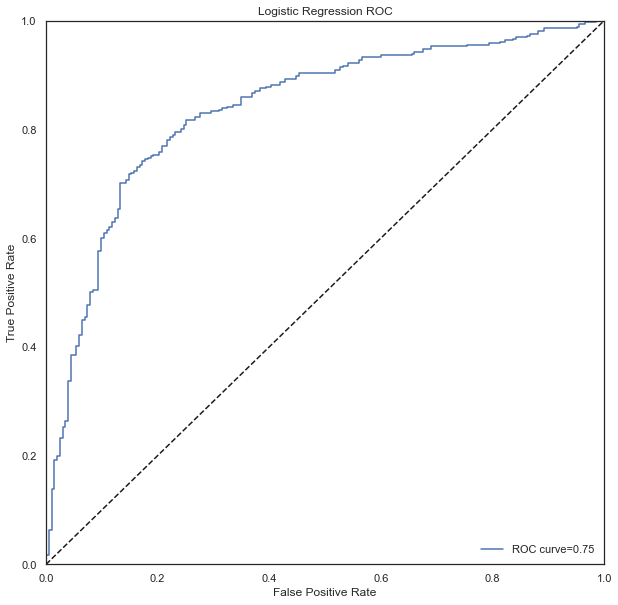

In [216]:

model_roc = roc_auc_score(y_test,  y_pred1)
fpr4,tpr4,thresholds4=roc_curve(y_test, model1.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.savefig("graph/ROC Logistic.png")

#### Logistic Regression balanced

In [138]:
model2=LogisticRegression(max_iter=1e8, class_weight='balanced')
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
conf2=confusion_matrix(y_test,y_pred2)
display(conf2)
acc2=accuracy_score(y_test,y_pred2)
rec2=recall_score(y_test,y_pred2)
pr2=precision_score(y_test,y_pred2)
f12=f1_score(y_test,y_pred2)
print(acc2,pr2,rec2,f12)
model.append(["Logistic Regression balanced",acc2,pr2,rec2,f12])

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[157,  46],
       [ 77, 284]], dtype=int64)

0.7819148936170213 0.8606060606060606 0.7867036011080333 0.8219971056439942


#### Support Vector Machine

Area under the ROC curve : 0.828432


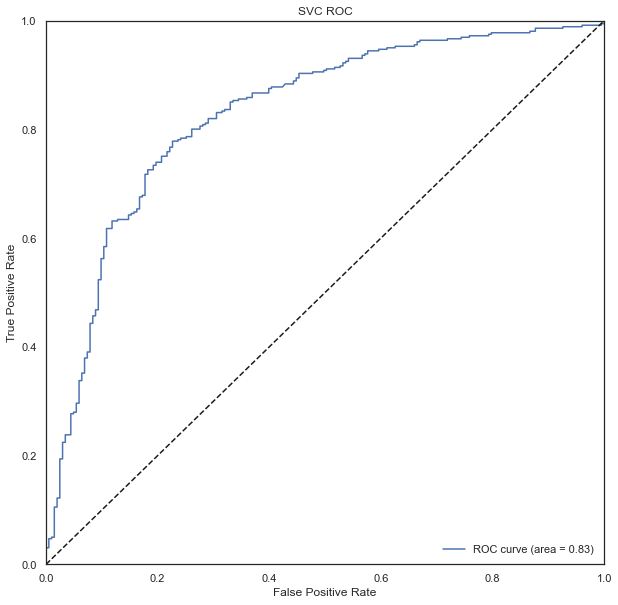

array([[128,  75],
       [ 48, 313]], dtype=int64)

0.7819148936170213 0.8067010309278351 0.8670360110803325 0.835781041388518


In [281]:
model3=SVC(probability=True)
test=model3.fit(X_train,y_train)
test = classifier.fit(X_train, y_train)
probas_=test.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC')
plt.legend(loc="lower right")
plt.savefig("graph/ROC SVC.png")
plt.show()
y_pred3=model3.predict(X_test)
conf3=confusion_matrix(y_test,y_pred3)
display(conf3)
acc3=accuracy_score(y_test,y_pred3)
rec3=recall_score(y_test,y_pred3)
pr3=precision_score(y_test,y_pred3)
f13=f1_score(y_test,y_pred3)
print(acc3,pr3,rec3,f13)


In [285]:
pd.DataFrame(conf3, columns=["Predicted Non-User", "Predicted User"], index=["Actual Non-User", "Actual User"])

,Predicted Non-User,Predicted User
Actual Non-User,128,75
Actual User,48,313


#### Nu-Support Vector Machine

In [141]:
model4=NuSVC(nu=0.1)
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
conf4=confusion_matrix(y_test,y_pred4)
display(conf4)
acc4=accuracy_score(y_test,y_pred4)
rec4=recall_score(y_test,y_pred4)
pr4=precision_score(y_test,y_pred4)
f14=f1_score(y_test,y_pred4)
print(acc4,pr4,rec4,f14)
model.append(["Nu SVC",acc4,pr4,rec4,f14])

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[106,  97],
       [ 71, 290]], dtype=int64)

0.7021276595744681 0.7493540051679587 0.8033240997229917 0.7754010695187167


#### Gaussian Naive Bayes

In [142]:
model5=GaussianNB()
model5.fit(X_train,y_train)
y_pred5=model5.predict(X_test)
conf5=confusion_matrix(y_test,y_pred5)
display(conf5)
acc5=accuracy_score(y_test,y_pred5)
rec5=recall_score(y_test,y_pred5)
pr5=precision_score(y_test,y_pred5)
f15=f1_score(y_test,y_pred5)
print(acc5,pr5,rec5,f15)
model.append(["Gaussian Naive Bayes",acc5,pr5,rec5,f15])

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[144,  59],
       [ 75, 286]], dtype=int64)

0.7624113475177305 0.8289855072463768 0.7922437673130194 0.8101983002832861


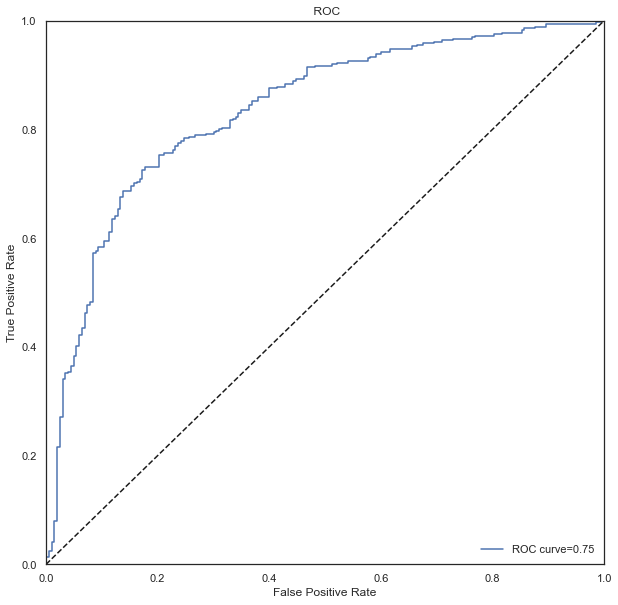

In [297]:

model_roc = roc_auc_score(y_test,  y_pred5)
fpr4,tpr4,thresholds4=roc_curve(y_test, model5.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC')
plt.legend(loc="lower right")

#### Decision Trees

In [143]:
model6=DecisionTreeClassifier()
model6.fit(X_train,y_train)
y_pred6=model6.predict(X_test)
conf6=confusion_matrix(y_test,y_pred6)
display(conf6)
acc6=accuracy_score(y_test,y_pred6)
rec6=recall_score(y_test,y_pred6)
pr6=precision_score(y_test,y_pred6)
f16=f1_score(y_test,y_pred6)
print(acc6,pr6,rec6,f16)
model.append(["Decision Tree",acc6,pr6,rec6,f16])

array([[115,  88],
       [ 67, 294]], dtype=int64)

0.725177304964539 0.7696335078534031 0.814404432132964 0.7913862718707941


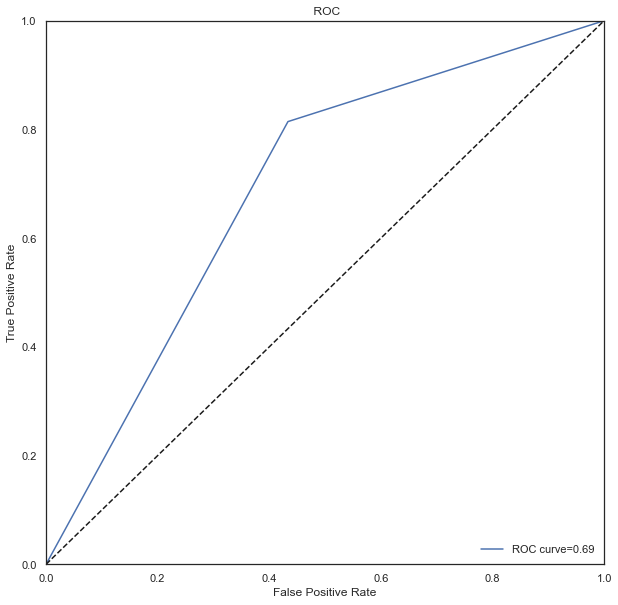

In [298]:

model_roc = roc_auc_score(y_test,  y_pred6)
fpr4,tpr4,thresholds4=roc_curve(y_test, model6.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC')
plt.legend(loc="lower right")

In [131]:
confusion_matrix(y_train,model6.predict(X_train))

array([[474,   0],
       [  0, 839]], dtype=int64)

#### Random Forest

In [144]:
model7=RandomForestClassifier()
model7.fit(X_train,y_train)
y_pred7=model7.predict(X_test)
conf7=confusion_matrix(y_test,y_pred7)
display(conf7)
acc7=accuracy_score(y_test,y_pred7)
rec7=recall_score(y_test,y_pred7)
pr7=precision_score(y_test,y_pred7)
f17=f1_score(y_test,y_pred7)
print(acc7,pr7,rec7,f17)
model.append(["Random Forest",acc7,pr7,rec7,f17])

<ipython-input-144-f21fb9904bd8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model7.fit(X_train,y_train)


array([[128,  75],
       [ 45, 316]], dtype=int64)

0.7872340425531915 0.8081841432225064 0.8753462603878116 0.8404255319148937


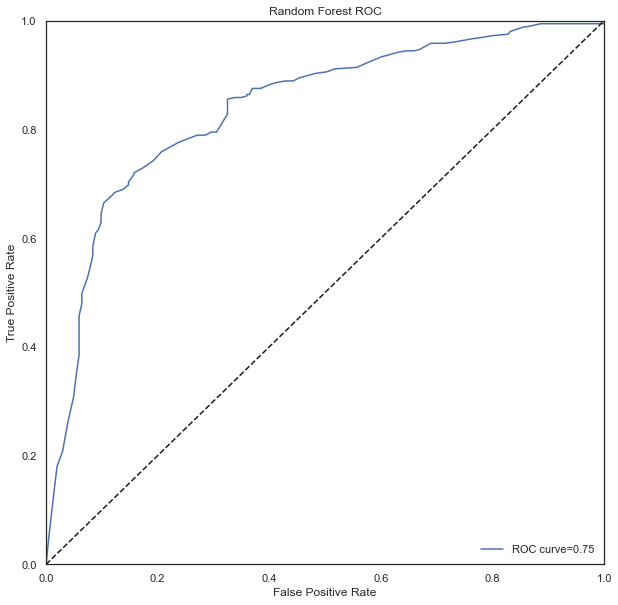

In [219]:

model_roc = roc_auc_score(y_test,  y_pred7)
fpr4,tpr4,thresholds4=roc_curve(y_test, model7.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.legend(loc="lower right")
plt.savefig("graph/ROC Random Forest.png")

In [133]:
confusion_matrix(y_train,model7.predict(X_train))

array([[474,   0],
       [  0, 839]], dtype=int64)

#### Random Forest balanced

In [145]:
model8=RandomForestClassifier(class_weight='balanced')
model8.fit(X_train,y_train)
y_pred8=model8.predict(X_test)
conf8=confusion_matrix(y_test,y_pred8)
display(conf8)
acc8=accuracy_score(y_test,y_pred8)
rec8=recall_score(y_test,y_pred8)
pr8=precision_score(y_test,y_pred8)
f18=f1_score(y_test,y_pred8)
print(acc8,pr8,rec8,f18)
model.append(["Random Forest balanced",acc8,pr8,rec8,f18])

<ipython-input-145-0d685d67038a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model8.fit(X_train,y_train)


array([[125,  78],
       [ 49, 312]], dtype=int64)

0.774822695035461 0.8 0.8642659279778393 0.8308921438082556


In [ ]:
confusion_matrix(y_train,model8.predict(X_train))

#### AdaBoost

In [146]:
model9=AdaBoostClassifier()
model9.fit(X_train,y_train)
y_pred9=model9.predict(X_test)
conf9=confusion_matrix(y_test,y_pred9)
display(conf9)
acc9=accuracy_score(y_test,y_pred9)
rec9=recall_score(y_test,y_pred9)
pr9=precision_score(y_test,y_pred9)
f19=f1_score(y_test,y_pred9)
print(acc9,pr9,rec9,f19)
model.append(["AdaBoost",acc9,pr9,rec9,f19])

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[127,  76],
       [ 54, 307]], dtype=int64)

0.7695035460992907 0.8015665796344648 0.850415512465374 0.825268817204301


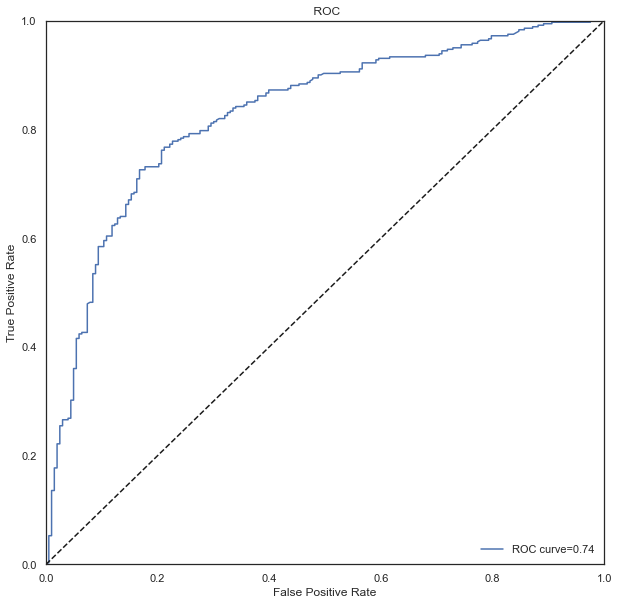

In [299]:

model_roc = roc_auc_score(y_test,  y_pred9)
fpr4,tpr4,thresholds4=roc_curve(y_test, model9.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC')
plt.legend(loc="lower right")

In [ ]:
confusion_matrix(y_train,model9.predict(X_train))

#### XGBoost

In [147]:
model10=XGBClassifier()
model10.fit(X_train,y_train)
y_pred10=model10.predict(X_test)
conf10=confusion_matrix(y_test,y_pred10)
display(conf10)
acc10=accuracy_score(y_test,y_pred10)
rec10=recall_score(y_test,y_pred10)
pr10=precision_score(y_test,y_pred10)
f110=f1_score(y_test,y_pred10)
print(acc10,pr10,rec10,f110)
model.append(["XGBoost",acc10,pr10,rec10,f110])

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[119,  84],
       [ 49, 312]], dtype=int64)

0.7641843971631206 0.7878787878787878 0.8642659279778393 0.8243064729194187


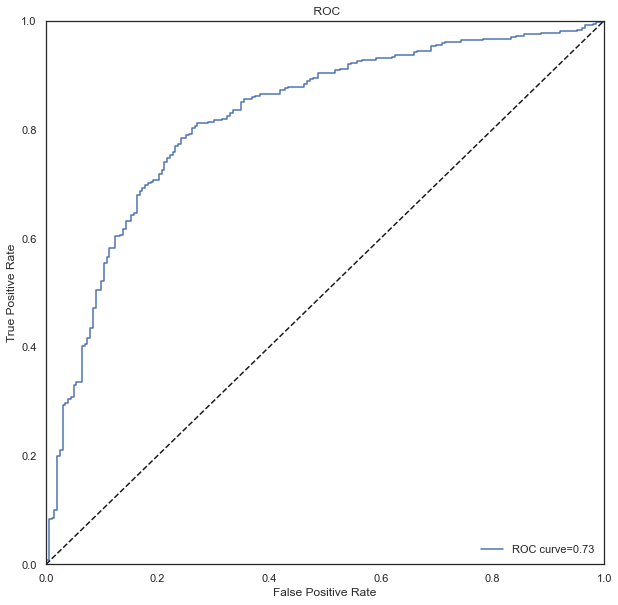

In [300]:

model_roc = roc_auc_score(y_test,  y_pred10)
fpr4,tpr4,thresholds4=roc_curve(y_test, model10.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC')
plt.legend(loc="lower right")

In [ ]:
confusion_matrix(y_train,model10.predict(X_train))

#### K-Nearest Neighbors

In [148]:
model11=KNeighborsClassifier(n_neighbors=7)
model11.fit(X_train,y_train)
y_pred11=model11.predict(X_test)
conf11=confusion_matrix(y_test,y_pred11)
display(conf11)
acc11=accuracy_score(y_test,y_pred11)
rec11=recall_score(y_test,y_pred11)
pr11=precision_score(y_test,y_pred11)
f111=f1_score(y_test,y_pred11)
print(acc11,pr11,rec11,f111)
model.append(["KNN",acc11,pr11,rec11,f111])

<ipython-input-148-dc296e1e7da5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model11.fit(X_train,y_train)


array([[128,  75],
       [ 49, 312]], dtype=int64)

0.7801418439716312 0.8062015503875969 0.8642659279778393 0.8342245989304813


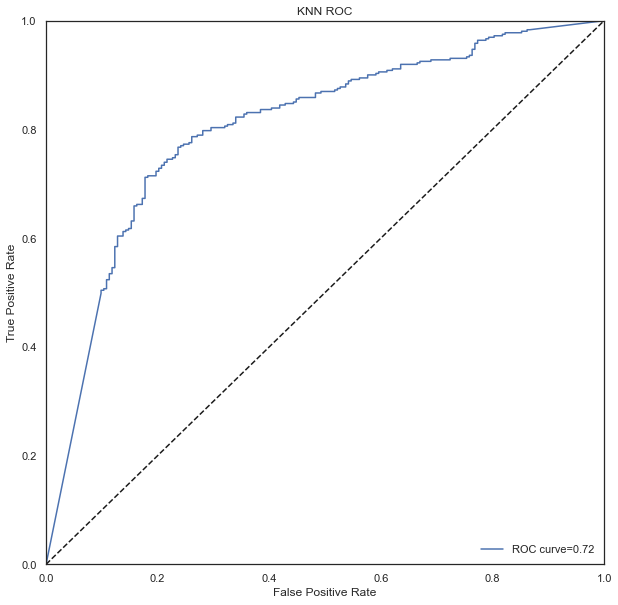

In [218]:

model_roc = roc_auc_score(y_test,  y_pred11)
fpr4,tpr4,thresholds4=roc_curve(y_test, model11.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC')
plt.legend(loc="lower right")
plt.savefig("graph/ROC KNN.png")

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred11)
auc=roc_auc_score(y_test,y_pred11)
plt.plot(fpr,tpr)
print(auc)

In [149]:
model11=KNeighborsClassifier(weights='distance')
model11.fit(X_train,y_train)
y_pred11=model11.predict(X_test)
conf11=confusion_matrix(y_test,y_pred11)
display(conf11)
acc11=accuracy_score(y_test,y_pred11)
rec11=recall_score(y_test,y_pred11)
pr11=precision_score(y_test,y_pred11)
f111=f1_score(y_test,y_pred11)
print(acc11,pr11,rec11,f111)

<ipython-input-149-c1f8a7f1edd3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model11.fit(X_train,y_train)


array([[120,  83],
       [ 58, 303]], dtype=int64)

0.75 0.7849740932642487 0.8393351800554016 0.8112449799196788


#### Catboost

In [150]:
model12=CatBoostClassifier()
model12.fit(X_train,y_train)
y_pred12=model12.predict(X_test)
conf12=confusion_matrix(y_test,[eval(i) for i in y_pred12])
display(conf12)
acc12=accuracy_score(y_test,[eval(i) for i in y_pred12])
rec12=recall_score(y_test,[eval(i) for i in y_pred12])
pr12=precision_score(y_test,[eval(i) for i in y_pred12])
f112=f1_score(y_test,[eval(i) for i in y_pred12])
print(acc12,pr12,rec12,f112)
model.append(["CatBoost",acc12,pr12,rec12,f112])

Learning rate set to 0.011573
0:	learn: 0.6865814	total: 71.9ms	remaining: 1m 11s
1:	learn: 0.6807637	total: 73ms	remaining: 36.4s
2:	learn: 0.6748252	total: 74.1ms	remaining: 24.6s
3:	learn: 0.6687753	total: 75.2ms	remaining: 18.7s
4:	learn: 0.6627113	total: 76.3ms	remaining: 15.2s
5:	learn: 0.6565110	total: 77.4ms	remaining: 12.8s
6:	learn: 0.6507870	total: 78.5ms	remaining: 11.1s
7:	learn: 0.6444065	total: 79.6ms	remaining: 9.87s
8:	learn: 0.6390658	total: 80.7ms	remaining: 8.88s
9:	learn: 0.6343687	total: 81.8ms	remaining: 8.1s
10:	learn: 0.6293854	total: 82.9ms	remaining: 7.45s
11:	learn: 0.6247148	total: 84ms	remaining: 6.91s
12:	learn: 0.6191502	total: 85.2ms	remaining: 6.47s
13:	learn: 0.6138691	total: 86.8ms	remaining: 6.11s
14:	learn: 0.6093572	total: 88.3ms	remaining: 5.8s
15:	learn: 0.6045013	total: 89.7ms	remaining: 5.52s
16:	learn: 0.6005026	total: 91.6ms	remaining: 5.3s
17:	learn: 0.5956028	total: 93.5ms	remaining: 5.1s
18:	learn: 0.5908960	total: 95.1ms	remaining: 4.91s

187:	learn: 0.3831288	total: 314ms	remaining: 1.35s
188:	learn: 0.3826439	total: 315ms	remaining: 1.35s
189:	learn: 0.3821380	total: 316ms	remaining: 1.35s
190:	learn: 0.3818498	total: 318ms	remaining: 1.35s
191:	learn: 0.3814523	total: 319ms	remaining: 1.34s
192:	learn: 0.3811478	total: 321ms	remaining: 1.34s
193:	learn: 0.3807586	total: 322ms	remaining: 1.34s
194:	learn: 0.3802174	total: 323ms	remaining: 1.33s
195:	learn: 0.3796169	total: 325ms	remaining: 1.33s
196:	learn: 0.3793665	total: 327ms	remaining: 1.33s
197:	learn: 0.3792298	total: 329ms	remaining: 1.33s
198:	learn: 0.3789697	total: 333ms	remaining: 1.34s
199:	learn: 0.3786041	total: 334ms	remaining: 1.34s
200:	learn: 0.3782842	total: 336ms	remaining: 1.33s
201:	learn: 0.3780649	total: 337ms	remaining: 1.33s
202:	learn: 0.3775417	total: 339ms	remaining: 1.33s
203:	learn: 0.3770176	total: 340ms	remaining: 1.33s
204:	learn: 0.3764987	total: 342ms	remaining: 1.32s
205:	learn: 0.3762452	total: 343ms	remaining: 1.32s
206:	learn: 

444:	learn: 0.3179459	total: 642ms	remaining: 801ms
445:	learn: 0.3175463	total: 643ms	remaining: 799ms
446:	learn: 0.3172201	total: 645ms	remaining: 798ms
447:	learn: 0.3171246	total: 646ms	remaining: 796ms
448:	learn: 0.3168683	total: 647ms	remaining: 794ms
449:	learn: 0.3166270	total: 648ms	remaining: 792ms
450:	learn: 0.3164908	total: 650ms	remaining: 791ms
451:	learn: 0.3161669	total: 651ms	remaining: 789ms
452:	learn: 0.3159295	total: 652ms	remaining: 788ms
453:	learn: 0.3155223	total: 653ms	remaining: 786ms
454:	learn: 0.3154226	total: 655ms	remaining: 784ms
455:	learn: 0.3152449	total: 656ms	remaining: 782ms
456:	learn: 0.3149621	total: 657ms	remaining: 780ms
457:	learn: 0.3144873	total: 658ms	remaining: 779ms
458:	learn: 0.3142355	total: 659ms	remaining: 777ms
459:	learn: 0.3139291	total: 660ms	remaining: 775ms
460:	learn: 0.3137308	total: 662ms	remaining: 774ms
461:	learn: 0.3135911	total: 663ms	remaining: 772ms
462:	learn: 0.3132961	total: 664ms	remaining: 770ms
463:	learn: 

715:	learn: 0.2692684	total: 973ms	remaining: 386ms
716:	learn: 0.2691957	total: 975ms	remaining: 385ms
717:	learn: 0.2689450	total: 976ms	remaining: 383ms
718:	learn: 0.2688850	total: 977ms	remaining: 382ms
719:	learn: 0.2688567	total: 978ms	remaining: 380ms
720:	learn: 0.2687453	total: 979ms	remaining: 379ms
721:	learn: 0.2685535	total: 981ms	remaining: 378ms
722:	learn: 0.2685235	total: 982ms	remaining: 376ms
723:	learn: 0.2683865	total: 983ms	remaining: 375ms
724:	learn: 0.2683703	total: 984ms	remaining: 373ms
725:	learn: 0.2680387	total: 985ms	remaining: 372ms
726:	learn: 0.2677076	total: 986ms	remaining: 370ms
727:	learn: 0.2674171	total: 987ms	remaining: 369ms
728:	learn: 0.2672424	total: 989ms	remaining: 368ms
729:	learn: 0.2672183	total: 990ms	remaining: 366ms
730:	learn: 0.2670154	total: 991ms	remaining: 365ms
731:	learn: 0.2668083	total: 992ms	remaining: 363ms
732:	learn: 0.2666095	total: 994ms	remaining: 362ms
733:	learn: 0.2665162	total: 995ms	remaining: 361ms
734:	learn: 

963:	learn: 0.2320888	total: 1.3s	remaining: 48.5ms
964:	learn: 0.2318519	total: 1.3s	remaining: 47.1ms
965:	learn: 0.2316966	total: 1.3s	remaining: 45.8ms
966:	learn: 0.2314924	total: 1.3s	remaining: 44.4ms
967:	learn: 0.2313556	total: 1.3s	remaining: 43.1ms
968:	learn: 0.2311493	total: 1.3s	remaining: 41.8ms
969:	learn: 0.2310770	total: 1.31s	remaining: 40.4ms
970:	learn: 0.2310084	total: 1.31s	remaining: 39.1ms
971:	learn: 0.2309532	total: 1.31s	remaining: 37.7ms
972:	learn: 0.2307221	total: 1.31s	remaining: 36.4ms
973:	learn: 0.2304907	total: 1.31s	remaining: 35ms
974:	learn: 0.2303484	total: 1.31s	remaining: 33.7ms
975:	learn: 0.2300867	total: 1.31s	remaining: 32.3ms
976:	learn: 0.2300227	total: 1.32s	remaining: 31ms
977:	learn: 0.2298208	total: 1.32s	remaining: 29.6ms
978:	learn: 0.2295701	total: 1.32s	remaining: 28.3ms
979:	learn: 0.2294653	total: 1.32s	remaining: 26.9ms
980:	learn: 0.2292999	total: 1.32s	remaining: 25.6ms
981:	learn: 0.2291014	total: 1.32s	remaining: 24.2ms
982

array([[133,  70],
       [ 46, 315]], dtype=int64)

0.7943262411347518 0.8181818181818182 0.8725761772853186 0.8445040214477212


In [ ]:
confusion_matrix(y_train,[eval(i) for i in model12.predict(X_train)])

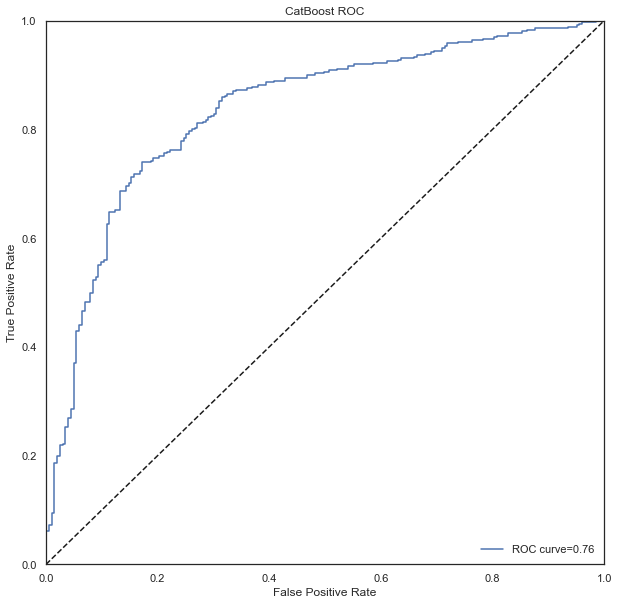

In [215]:
model_roc = roc_auc_score(y_test, [eval(i) for i in y_pred12])
fpr4,tpr4,thresholds4=roc_curve(y_test, model12.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC')
plt.legend(loc="lower right")
plt.savefig("graph/ROC Cat.png")

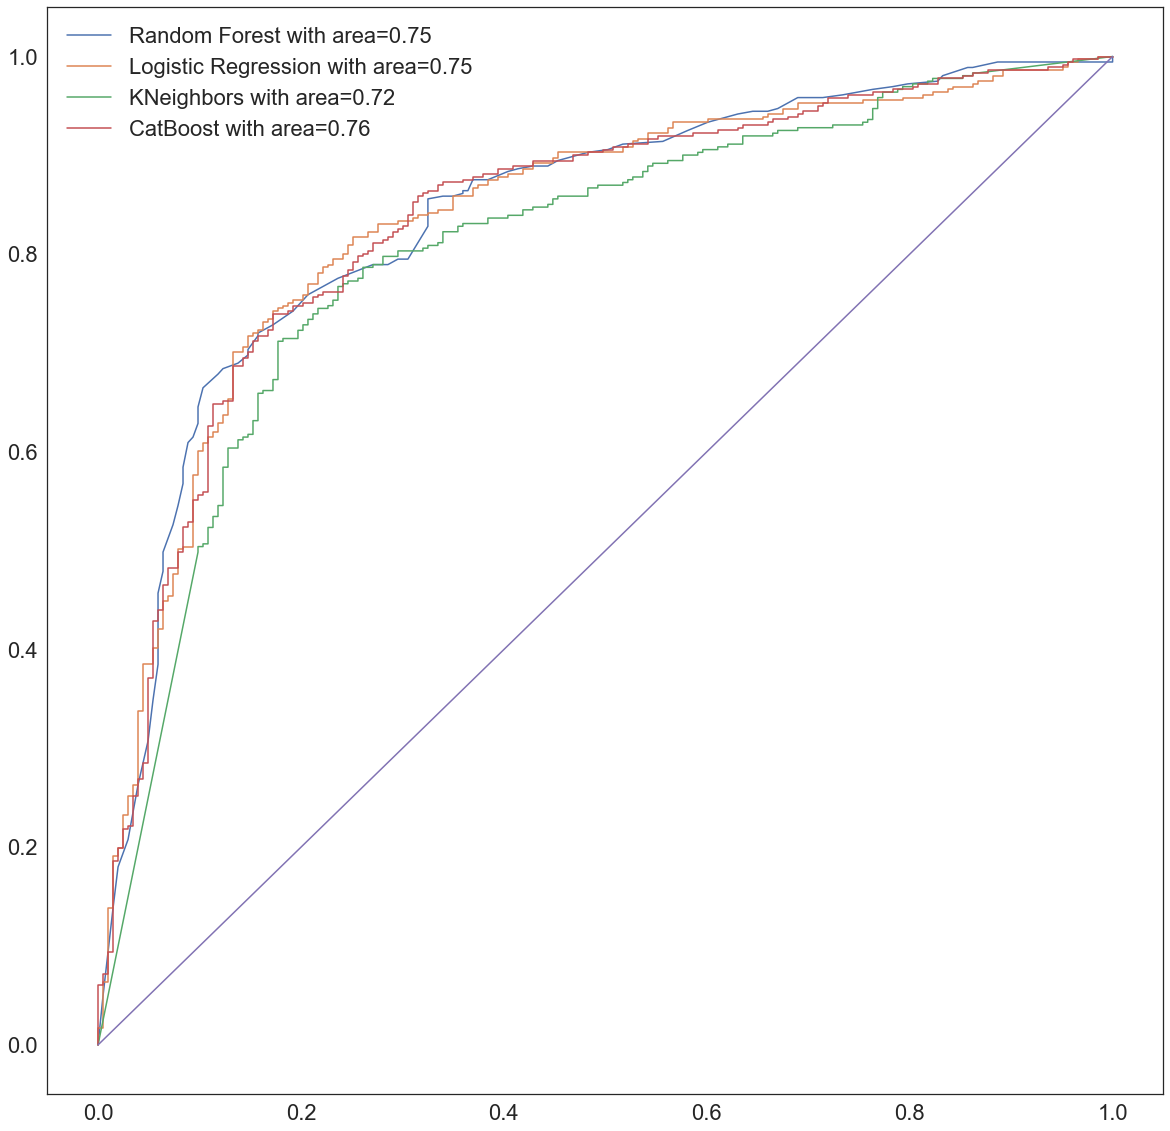

In [179]:
model_roc1=roc_auc_score(y_test, y_pred7)
fpr1,tpr1,thresholds1=roc_curve(y_test, model7.predict_proba(X_test)[:,1])

model_roc2=roc_auc_score(y_test, y_pred1)
fpr2,tpr2,thresholds2=roc_curve(y_test, model1.predict_proba(X_test)[:,1])

model_roc3=roc_auc_score(y_test, y_pred11)
fpr3,tpr3,thresholds3=roc_curve(y_test, model11.predict_proba(X_test)[:,1])

model_roc4=roc_auc_score(y_test, [eval(i) for i in y_pred12])
fpr4,tpr4,thresholds4=roc_curve(y_test, model12.predict_proba(X_test)[:,1])

plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 2)
plt.figure(figsize=(20,20))
plt.plot(fpr1,tpr1, label=f'Random Forest with area={model_roc1.round(2)}')
plt.plot(fpr2,tpr2, label=f'Logistic Regression with area={model_roc2.round(2)}')
plt.plot(fpr3,tpr3, label=f'KNeighbors with area={model_roc3.round(2)}')
plt.plot(fpr4,tpr4, label=f'CatBoost with area={model_roc4.round(2)}')

plt.plot([0,1],[0,1])
plt.legend()
plt.show()

In [305]:
model.remove(['SVC', 0.7819148936170213,  0.8067010309278351,  0.8670360110803325,  0.835781041388518])

In [304]:
model

[['Logistic Regression',
  0.7819148936170213,
  0.8115183246073299,
  0.8587257617728532,
  0.8344549125168237],
 ['Logistic Regression balanced',
  0.7819148936170213,
  0.8606060606060606,
  0.7867036011080333,
  0.8219971056439942],
 ['Nu SVC',
  0.7021276595744681,
  0.7493540051679587,
  0.8033240997229917,
  0.7754010695187167],
 ['Gaussian Naive Bayes',
  0.7624113475177305,
  0.8289855072463768,
  0.7922437673130194,
  0.8101983002832861],
 ['Decision Tree',
  0.725177304964539,
  0.7696335078534031,
  0.814404432132964,
  0.7913862718707941],
 ['Random Forest',
  0.7872340425531915,
  0.8081841432225064,
  0.8753462603878116,
  0.8404255319148937],
 ['Random Forest balanced',
  0.774822695035461,
  0.8,
  0.8642659279778393,
  0.8308921438082556],
 ['AdaBoost',
  0.7695035460992907,
  0.8015665796344648,
  0.850415512465374,
  0.825268817204301],
 ['XGBoost',
  0.7641843971631206,
  0.7878787878787878,
  0.8642659279778393,
  0.8243064729194187],
 ['KNN',
  0.7801418439716312

In [306]:
pd.DataFrame(model, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])\
.set_index("Model").sort_values(by="Recall", ascending=False)

,Accuracy,Precision,Recall,F1
Model,,,,
Random Forest,0.787234,0.808184,0.875346,0.840426
CatBoost,0.794326,0.818182,0.872576,0.844504
SVC,0.781915,0.806701,0.867036,0.835781
Random Forest balanced,0.774823,0.800000,0.864266,0.830892
XGBoost,0.764184,0.787879,0.864266,0.824306
KNN,0.780142,0.806202,0.864266,0.834225
Logistic Regression,0.781915,0.811518,0.858726,0.834455
AdaBoost,0.769504,0.801567,0.850416,0.825269
Decision Tree,0.725177,0.769634,0.814404,0.791386


#### PCA

In [220]:
pca=PCA(0.85).fit(X_train)
X_train2=pca.transform(X_train)
X_test2=pca.transform(X_test)

In [221]:
pca.explained_variance_ratio_.round(2)

array([0.26, 0.2 , 0.1 , 0.1 , 0.08, 0.06, 0.06])

In [ ]:
pca.singular_values_.shape[0]

##### Catboost

In [222]:
model12=CatBoostClassifier()
model12.fit(X_train2,y_train)
y_pred12=model12.predict(X_test2)
conf12=confusion_matrix(y_test,[eval(i) for i in y_pred12])
display(conf12)
acc12=accuracy_score(y_test,[eval(i) for i in y_pred12])
rec12=recall_score(y_test,[eval(i) for i in y_pred12])
pr12=precision_score(y_test,[eval(i) for i in y_pred12])
f112=f1_score(y_test,[eval(i) for i in y_pred12])
print(acc12,pr12,rec12,f112)

Learning rate set to 0.011573
0:	learn: 0.6877111	total: 4.77ms	remaining: 4.76s
1:	learn: 0.6829013	total: 13.1ms	remaining: 6.54s
2:	learn: 0.6776400	total: 14.7ms	remaining: 4.88s
3:	learn: 0.6723069	total: 16.1ms	remaining: 4.02s
4:	learn: 0.6681744	total: 17.9ms	remaining: 3.57s
5:	learn: 0.6634198	total: 19.5ms	remaining: 3.23s
6:	learn: 0.6590771	total: 21.1ms	remaining: 3s
7:	learn: 0.6544871	total: 22.7ms	remaining: 2.82s
8:	learn: 0.6495066	total: 24.5ms	remaining: 2.7s
9:	learn: 0.6450297	total: 26.3ms	remaining: 2.61s
10:	learn: 0.6405097	total: 27.9ms	remaining: 2.51s
11:	learn: 0.6355972	total: 29.7ms	remaining: 2.45s
12:	learn: 0.6319196	total: 31.4ms	remaining: 2.38s
13:	learn: 0.6280062	total: 33ms	remaining: 2.32s
14:	learn: 0.6236722	total: 34.5ms	remaining: 2.27s
15:	learn: 0.6196241	total: 36.3ms	remaining: 2.23s
16:	learn: 0.6161260	total: 38ms	remaining: 2.2s
17:	learn: 0.6124347	total: 39.9ms	remaining: 2.17s
18:	learn: 0.6093213	total: 41.8ms	remaining: 2.16s
1

181:	learn: 0.4084025	total: 332ms	remaining: 1.49s
182:	learn: 0.4079566	total: 334ms	remaining: 1.49s
183:	learn: 0.4074518	total: 335ms	remaining: 1.49s
184:	learn: 0.4071183	total: 337ms	remaining: 1.48s
185:	learn: 0.4066601	total: 339ms	remaining: 1.48s
186:	learn: 0.4062647	total: 341ms	remaining: 1.48s
187:	learn: 0.4058182	total: 342ms	remaining: 1.48s
188:	learn: 0.4055600	total: 344ms	remaining: 1.48s
189:	learn: 0.4052008	total: 346ms	remaining: 1.47s
190:	learn: 0.4049093	total: 348ms	remaining: 1.47s
191:	learn: 0.4044871	total: 350ms	remaining: 1.47s
192:	learn: 0.4040371	total: 351ms	remaining: 1.47s
193:	learn: 0.4037234	total: 353ms	remaining: 1.47s
194:	learn: 0.4033126	total: 354ms	remaining: 1.46s
195:	learn: 0.4029317	total: 356ms	remaining: 1.46s
196:	learn: 0.4023642	total: 358ms	remaining: 1.46s
197:	learn: 0.4020187	total: 360ms	remaining: 1.46s
198:	learn: 0.4015536	total: 362ms	remaining: 1.46s
199:	learn: 0.4012054	total: 364ms	remaining: 1.46s
200:	learn: 

376:	learn: 0.3480204	total: 670ms	remaining: 1.11s
377:	learn: 0.3478211	total: 672ms	remaining: 1.1s
378:	learn: 0.3477119	total: 674ms	remaining: 1.1s
379:	learn: 0.3474494	total: 676ms	remaining: 1.1s
380:	learn: 0.3471937	total: 677ms	remaining: 1.1s
381:	learn: 0.3469576	total: 679ms	remaining: 1.1s
382:	learn: 0.3467672	total: 680ms	remaining: 1.09s
383:	learn: 0.3465698	total: 682ms	remaining: 1.09s
384:	learn: 0.3463290	total: 684ms	remaining: 1.09s
385:	learn: 0.3461451	total: 685ms	remaining: 1.09s
386:	learn: 0.3459354	total: 687ms	remaining: 1.09s
387:	learn: 0.3457665	total: 689ms	remaining: 1.09s
388:	learn: 0.3455502	total: 690ms	remaining: 1.08s
389:	learn: 0.3453556	total: 692ms	remaining: 1.08s
390:	learn: 0.3452031	total: 693ms	remaining: 1.08s
391:	learn: 0.3449197	total: 695ms	remaining: 1.08s
392:	learn: 0.3448314	total: 697ms	remaining: 1.08s
393:	learn: 0.3446524	total: 699ms	remaining: 1.07s
394:	learn: 0.3443235	total: 701ms	remaining: 1.07s
395:	learn: 0.344

591:	learn: 0.3032554	total: 1.01s	remaining: 699ms
592:	learn: 0.3030680	total: 1.01s	remaining: 697ms
593:	learn: 0.3029206	total: 1.02s	remaining: 695ms
594:	learn: 0.3027438	total: 1.02s	remaining: 694ms
595:	learn: 0.3025794	total: 1.02s	remaining: 692ms
596:	learn: 0.3024024	total: 1.02s	remaining: 690ms
597:	learn: 0.3021293	total: 1.02s	remaining: 689ms
598:	learn: 0.3019102	total: 1.03s	remaining: 687ms
599:	learn: 0.3017141	total: 1.03s	remaining: 686ms
600:	learn: 0.3014461	total: 1.03s	remaining: 684ms
601:	learn: 0.3013306	total: 1.03s	remaining: 682ms
602:	learn: 0.3011992	total: 1.03s	remaining: 681ms
603:	learn: 0.3009827	total: 1.03s	remaining: 679ms
604:	learn: 0.3008190	total: 1.04s	remaining: 678ms
605:	learn: 0.3007238	total: 1.04s	remaining: 676ms
606:	learn: 0.3005934	total: 1.04s	remaining: 674ms
607:	learn: 0.3004625	total: 1.04s	remaining: 673ms
608:	learn: 0.3002631	total: 1.04s	remaining: 671ms
609:	learn: 0.3000962	total: 1.05s	remaining: 669ms
610:	learn: 

801:	learn: 0.2668452	total: 1.35s	remaining: 334ms
802:	learn: 0.2666534	total: 1.35s	remaining: 332ms
803:	learn: 0.2665497	total: 1.36s	remaining: 331ms
804:	learn: 0.2664722	total: 1.36s	remaining: 330ms
805:	learn: 0.2663911	total: 1.36s	remaining: 328ms
806:	learn: 0.2662450	total: 1.36s	remaining: 326ms
807:	learn: 0.2661206	total: 1.37s	remaining: 325ms
808:	learn: 0.2658791	total: 1.37s	remaining: 323ms
809:	learn: 0.2657237	total: 1.37s	remaining: 322ms
810:	learn: 0.2655213	total: 1.37s	remaining: 320ms
811:	learn: 0.2654003	total: 1.38s	remaining: 319ms
812:	learn: 0.2652813	total: 1.38s	remaining: 317ms
813:	learn: 0.2650808	total: 1.38s	remaining: 315ms
814:	learn: 0.2649656	total: 1.38s	remaining: 314ms
815:	learn: 0.2648406	total: 1.38s	remaining: 312ms
816:	learn: 0.2647032	total: 1.39s	remaining: 310ms
817:	learn: 0.2645710	total: 1.39s	remaining: 309ms
818:	learn: 0.2645278	total: 1.39s	remaining: 307ms
819:	learn: 0.2644246	total: 1.39s	remaining: 305ms
820:	learn: 

979:	learn: 0.2410252	total: 1.69s	remaining: 34.4ms
980:	learn: 0.2408690	total: 1.69s	remaining: 32.7ms
981:	learn: 0.2407380	total: 1.69s	remaining: 31ms
982:	learn: 0.2405453	total: 1.69s	remaining: 29.3ms
983:	learn: 0.2404906	total: 1.69s	remaining: 27.5ms
984:	learn: 0.2403858	total: 1.69s	remaining: 25.8ms
985:	learn: 0.2401529	total: 1.7s	remaining: 24.1ms
986:	learn: 0.2399431	total: 1.7s	remaining: 22.4ms
987:	learn: 0.2397235	total: 1.7s	remaining: 20.6ms
988:	learn: 0.2395996	total: 1.7s	remaining: 18.9ms
989:	learn: 0.2394487	total: 1.7s	remaining: 17.2ms
990:	learn: 0.2392997	total: 1.71s	remaining: 15.5ms
991:	learn: 0.2391441	total: 1.71s	remaining: 13.8ms
992:	learn: 0.2390337	total: 1.71s	remaining: 12ms
993:	learn: 0.2388695	total: 1.71s	remaining: 10.3ms
994:	learn: 0.2386926	total: 1.71s	remaining: 8.6ms
995:	learn: 0.2385483	total: 1.71s	remaining: 6.88ms
996:	learn: 0.2384010	total: 1.72s	remaining: 5.16ms
997:	learn: 0.2382947	total: 1.72s	remaining: 3.44ms
998

array([[124,  79],
       [ 49, 312]], dtype=int64)

0.7730496453900709 0.7979539641943734 0.8642659279778393 0.8297872340425532


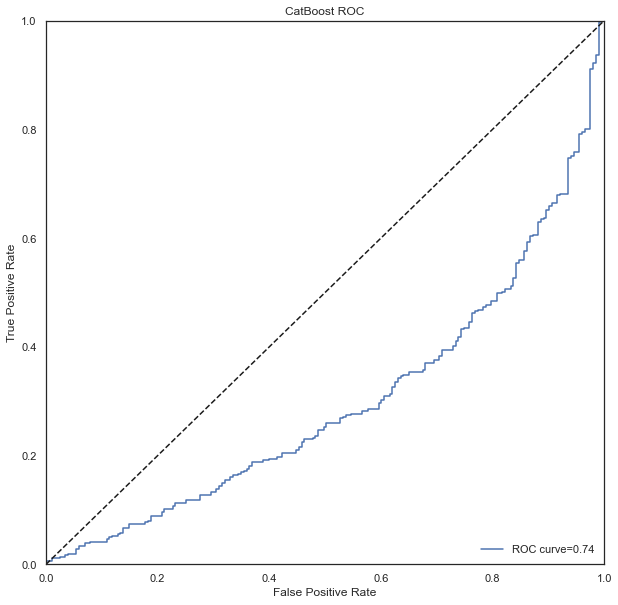

In [226]:
model_roc = roc_auc_score(y_test, [eval(i) for i in y_pred12])
fpr4,tpr4,thresholds4=roc_curve(y_test, model12.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC')
plt.legend(loc="lower right")
plt.savefig("graph/ROC Cat2.png")

#### SVC

Area under the ROC curve : 0.828446


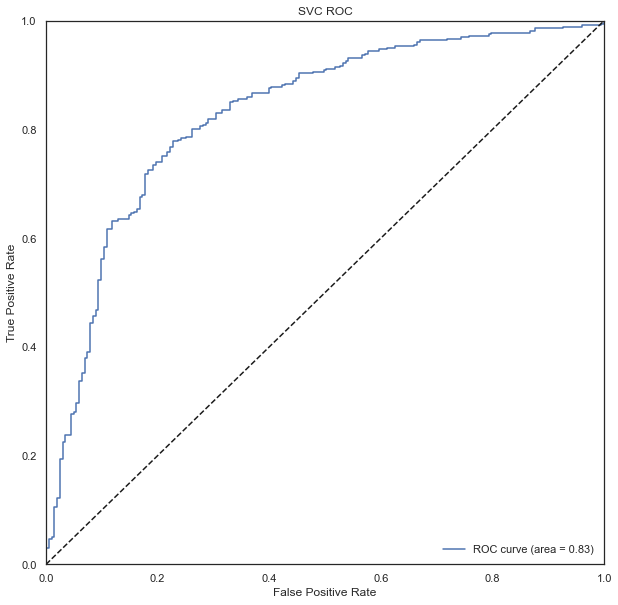

array([[128,  75],
       [ 48, 313]], dtype=int64)

0.7819148936170213 0.8067010309278351 0.8670360110803325 0.835781041388518


In [227]:
model3=SVC(probability=True)
test=model3.fit(X_train,y_train)
test = classifier.fit(X_train, y_train)
probas_=test.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC')
plt.legend(loc="lower right")
plt.savefig("graph/ROC SVC2.png")
plt.show()
y_pred3=model3.predict(X_test)
conf3=confusion_matrix(y_test,y_pred3)
display(conf3)
acc3=accuracy_score(y_test,y_pred3)
rec3=recall_score(y_test,y_pred3)
pr3=precision_score(y_test,y_pred3)
f13=f1_score(y_test,y_pred3)
print(acc3,pr3,rec3,f13)


##### Random Forest

In [ ]:
model7=RandomForestClassifier()
model7.fit(X_train2,y_train)
y_pred7=model7.predict(X_test2)
conf7=confusion_matrix(y_test,y_pred7)
display(conf7)
acc7=accuracy_score(y_test,y_pred7)
rec7=recall_score(y_test,y_pred7)
pr7=precision_score(y_test,y_pred7)
f17=f1_score(y_test,y_pred7)
print(acc7,pr7,rec7,f17)

In [ ]:
confusion_matrix(y_train,model7.predict(X_train2))

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred7)
auc=roc_auc_score(y_test,y_pred7)
plt.plot(fpr,tpr)
print(auc)

#### K-Nearest Neighbors

In [ ]:
model11=KNeighborsClassifier(n_neighbors=5)
model11.fit(X_train2,y_train)
y_pred11=model11.predict(X_test2)
conf11=confusion_matrix(y_test,y_pred11)
display(conf11)
acc11=accuracy_score(y_test,y_pred11)
rec11=recall_score(y_test,y_pred11)
pr11=precision_score(y_test,y_pred11)
f111=f1_score(y_test,y_pred11)
print(acc11,pr11,rec11,f111)

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred11)
auc=roc_auc_score(y_test,y_pred11)
plt.plot(fpr,tpr)
print(auc)

In [ ]:
model11=KNeighborsClassifier(weights='distance')
model11.fit(X_train2,y_train)
y_pred11=model11.predict(X_test2)
conf11=confusion_matrix(y_test,y_pred11)
display(conf11)
acc11=accuracy_score(y_test,y_pred11)
rec11=recall_score(y_test,y_pred11)
pr11=precision_score(y_test,y_pred11)
f111=f1_score(y_test,y_pred11)
print(acc11,pr11,rec11,f111)

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred11)
auc=roc_auc_score(y_test,y_pred11)
plt.plot(fpr,tpr)
print(auc)

Got worse with the PCA